# 1 - Data Prep and EDA 

In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data from Wikipedia

Extracting the list of companies from the below sectors from the link https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
```
Consumer Discretionary,Communication Services,Information Technology
```


In [ ]:
first_attempt = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print(type(first_attempt))
first_attempt

<class 'list'>


[    Symbol            Security             GICS Sector  \
 0      MMM                  3M             Industrials   
 1      AOS         A. O. Smith             Industrials   
 2      ABT              Abbott             Health Care   
 3     ABBV              AbbVie             Health Care   
 4      ACN           Accenture  Information Technology   
 ..     ...                 ...                     ...   
 498    XYL          Xylem Inc.             Industrials   
 499    YUM         Yum! Brands  Consumer Discretionary   
 500   ZBRA  Zebra Technologies  Information Technology   
 501    ZBH       Zimmer Biomet             Health Care   
 502    ZTS              Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care Equipment  N

In [ ]:
print("First position",first_attempt[0])

First position     Symbol            Security             GICS Sector  \
0      MMM                  3M             Industrials   
1      AOS         A. O. Smith             Industrials   
2      ABT              Abbott             Health Care   
3     ABBV              AbbVie             Health Care   
4      ACN           Accenture  Information Technology   
..     ...                 ...                     ...   
498    XYL          Xylem Inc.             Industrials   
499    YUM         Yum! Brands  Consumer Discretionary   
500   ZBRA  Zebra Technologies  Information Technology   
501    ZBH       Zimmer Biomet             Health Care   
502    ZTS              Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  Nor

In [ ]:
compData = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
compData.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
compData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


For our convience, we will call:

Consumer Discretionary as CD, Communication Services as CS, and Information Technology as IT companies in this analysis.



## Consumer Discretionary Companies List



In [ ]:
CD_companies = compData[compData['GICS Sector'] == 'Consumer Discretionary']
CD_companies.head()
CD_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 11 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 52 non-null     object
 1   Security               52 non-null     object
 2   GICS Sector            52 non-null     object
 3   GICS Sub-Industry      52 non-null     object
 4   Headquarters Location  52 non-null     object
 5   Date added             52 non-null     object
 6   CIK                    52 non-null     int64 
 7   Founded                52 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.7+ KB


## Communication Services Companies List

In [ ]:
CS_companies = compData[compData['GICS Sector'] == 'Communication Services']
CS_companies.head()
CS_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 19 to 483
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 22 non-null     object
 1   Security               22 non-null     object
 2   GICS Sector            22 non-null     object
 3   GICS Sub-Industry      22 non-null     object
 4   Headquarters Location  22 non-null     object
 5   Date added             22 non-null     object
 6   CIK                    22 non-null     int64 
 7   Founded                22 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.5+ KB


## Information Technology Companies List

In [ ]:
IT_companies = compData[compData['GICS Sector'] == 'Information Technology']
IT_companies.head()
IT_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 4 to 500
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 65 non-null     object
 1   Security               65 non-null     object
 2   GICS Sector            65 non-null     object
 3   GICS Sub-Industry      65 non-null     object
 4   Headquarters Location  65 non-null     object
 5   Date added             65 non-null     object
 6   CIK                    65 non-null     int64 
 7   Founded                65 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.6+ KB



# Downloading Stock Market Data

In [ ]:
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

## Download CD_dow_prices

In [ ]:
# Extract symbols from the 'Symbol' column
CD_tickers_list = CD_companies['Symbol'].tolist()

CD_dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in CD_tickers_list}

In [ ]:
CD_dow_prices

{'ABNB':                   open        high         low       close    adjclose  \
 2020-12-10  146.000000  165.000000  141.250000  144.710007  144.710007   
 2020-12-11  146.550003  151.500000  135.100006  139.250000  139.250000   
 2020-12-14  135.000000  135.300003  125.160004  130.000000  130.000000   
 2020-12-15  126.690002  127.599998  121.500000  124.800003  124.800003   
 2020-12-16  125.830002  142.000000  124.910004  137.990005  137.990005   
 ...                ...         ...         ...         ...         ...   
 2022-12-23   84.699997   85.510002   83.500000   85.250000   85.250000   
 2022-12-27   84.779999   84.930000   82.830002   83.489998   83.489998   
 2022-12-28   83.250000   84.250000   81.910004   82.489998   82.489998   
 2022-12-29   82.970001   85.559998   82.290001   85.230003   85.230003   
 2022-12-30   83.610001   86.059998   83.599998   85.500000   85.500000   
 
               volume ticker  
 2020-12-10  70447500   ABNB  
 2020-12-11  26980800   ABNB

### Extracting gains from previous day based on adjclose value

Since the first company in the list, ABNB has data from 2020, when it's taken as a reference, all the data is being removed when the gains dataset is being created. Thus, we're dropping ABNB.

In [ ]:
# Get the adjclose price for AMZN (one stock)
CD_prep_data = pd.DataFrame(CD_dow_prices['AMZN']['adjclose']).rename(columns={"adjclose": "AMZN"})

# Loop through the tickers list
for i in CD_tickers_list:
    # Skipping 'AMZN' as it's already processed
    if i == 'AMZN':
        continue
    # Checking if the ticker exists in CD_dow_prices
    if i in CD_dow_prices:
        # Add the ticker's adjclose prices to CD_prep_data
        CD_prep_data[i] = CD_dow_prices[i]['adjclose']

# Now CD_prep_data DataFrame contains 'AMZN' as the first column, followed by other tickers' adjclose prices
CD_prep_data

,AMZN,ABNB,APTV,AZO,BBWI,BBY,BKNG,BWA,CZR,KMX,...,ROST,RCL,SBUX,TPR,TSLA,TJX,TSCO,ULTA,WYNN,YUM
2017-01-03,37.683498,NaN,54.869354,791.460022,42.239773,33.773502,1473.798462,31.485716,17.049999,64.820000,...,61.121323,77.689903,47.784481,28.709925,14.466000,33.984562,67.871857,256.679993,80.211418,55.535851
2017-01-04,37.859001,NaN,56.900352,793.039978,42.721920,34.571243,1483.493774,32.075039,16.900000,66.760002,...,61.997017,78.273483,48.337006,29.300152,15.132667,34.511581,68.667732,260.920013,82.797707,55.737915
2017-01-05,39.022499,NaN,56.551025,792.000000,39.359493,33.678734,1499.861694,32.035748,16.650000,66.379997,...,61.195847,78.736626,48.742771,28.532068,15.116667,34.299870,67.630424,264.140015,83.861565,55.922432
2017-01-06,39.799500,NaN,56.193565,792.909973,38.845608,33.781406,1516.688721,32.295067,16.600000,65.400002,...,60.841850,78.116013,49.321182,28.734188,15.267333,34.223293,67.210129,263.299988,84.769524,56.598949
2017-01-09,39.846001,NaN,55.291801,790.340027,38.890018,34.231613,1525.735596,32.075039,16.100000,65.190002,...,60.972256,78.319794,50.244926,28.289511,15.418667,34.277351,67.397949,260.790009,85.063004,56.757103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.250000,85.250000,91.260002,2430.649902,40.856720,76.516441,1966.487671,34.633194,43.090000,60.160000,...,113.844185,49.790001,95.674965,35.844063,123.150002,78.013031,211.925156,456.399994,79.901886,125.889427
2022-12-27,83.040001,83.489998,91.500000,2454.320068,40.866470,76.996147,1993.169434,34.763069,41.750000,60.419998,...,113.410416,48.900002,96.580406,36.505009,109.099998,77.551826,217.812531,464.000000,83.475296,126.866089
2022-12-28,81.820000,82.489998,90.279999,2461.629883,39.697460,75.406555,1953.839966,34.182964,39.990002,59.240002,...,112.671036,48.000000,95.996246,35.365124,112.709999,77.218201,214.697968,463.519989,79.278275,126.289864
2022-12-29,84.180000,85.230003,93.809998,2464.379883,40.574219,76.412987,1998.395996,35.031475,41.439999,61.259998,...,114.218803,49.799999,97.135361,36.131432,121.820000,77.856026,221.610489,464.829987,80.436417,126.953987


In [ ]:
# Drop ABNB as it has no values before 2020
CD_prep_data.drop(columns=['ABNB'], inplace=True)

CD_prep_data

,AMZN,APTV,AZO,BBWI,BBY,BKNG,BWA,CZR,KMX,CCL,...,ROST,RCL,SBUX,TPR,TSLA,TJX,TSCO,ULTA,WYNN,YUM
2017-01-03,37.683498,54.869354,791.460022,42.239773,33.773502,1473.798462,31.485716,17.049999,64.820000,46.789986,...,61.121323,77.689903,47.784481,28.709925,14.466000,33.984562,67.871857,256.679993,80.211418,55.535851
2017-01-04,37.859001,56.900352,793.039978,42.721920,34.571243,1483.493774,32.075039,16.900000,66.760002,47.400223,...,61.997017,78.273483,48.337006,29.300152,15.132667,34.511581,68.667732,260.920013,82.797707,55.737915
2017-01-05,39.022499,56.551025,792.000000,39.359493,33.678734,1499.861694,32.035748,16.650000,66.379997,48.198898,...,61.195847,78.736626,48.742771,28.532068,15.116667,34.299870,67.630424,264.140015,83.861565,55.922432
2017-01-06,39.799500,56.193565,792.909973,38.845608,33.781406,1516.688721,32.295067,16.600000,65.400002,48.145046,...,60.841850,78.116013,49.321182,28.734188,15.267333,34.223293,67.210129,263.299988,84.769524,56.598949
2017-01-09,39.846001,55.291801,790.340027,38.890018,34.231613,1525.735596,32.075039,16.100000,65.190002,48.180946,...,60.972256,78.319794,50.244926,28.289511,15.418667,34.277351,67.397949,260.790009,85.063004,56.757103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.250000,91.260002,2430.649902,40.856720,76.516441,1966.487671,34.633194,43.090000,60.160000,7.810000,...,113.844185,49.790001,95.674965,35.844063,123.150002,78.013031,211.925156,456.399994,79.901886,125.889427
2022-12-27,83.040001,91.500000,2454.320068,40.866470,76.996147,1993.169434,34.763069,41.750000,60.419998,7.670000,...,113.410416,48.900002,96.580406,36.505009,109.099998,77.551826,217.812531,464.000000,83.475296,126.866089
2022-12-28,81.820000,90.279999,2461.629883,39.697460,75.406555,1953.839966,34.182964,39.990002,59.240002,7.670000,...,112.671036,48.000000,95.996246,35.365124,112.709999,77.218201,214.697968,463.519989,79.278275,126.289864
2022-12-29,84.180000,93.809998,2464.379883,40.574219,76.412987,1998.395996,35.031475,41.439999,61.259998,8.080000,...,114.218803,49.799999,97.135361,36.131432,121.820000,77.856026,221.610489,464.829987,80.436417,126.953987


In [ ]:
# Convert the index to datetime
CD_prep_data.index = pd.to_datetime(CD_prep_data.index)

# Group by year and get the last row of each group
CD_last_day_of_year = CD_prep_data.groupby(CD_prep_data.index.year).last()

print(CD_last_day_of_year)


            AMZN        APTV          AZO       BBWI        BBY         BKNG  \
2017   58.473499   83.334541   711.369995  40.147079  55.435429  1733.304443   
2018   75.098503   60.766808   838.340027  18.341406  43.996693  1718.023560   
2019   92.391998   94.729073  1191.310059  13.723334  75.015335  2048.487793   
2020  162.846497  130.289993  1185.439941  28.513887  87.553543  2221.584961   
2021  166.716995  164.949997  2096.389893  66.637886  91.440315  2393.105957   
2022   84.000000   93.129997  2466.179932  41.051556  75.444183  2010.135986   

            BWA        CZR         KMX        CCL  ...        ROST  \
2017  40.672676  33.150002   64.129997  61.090637  ...   75.491158   
2018  28.074331  36.209999   62.730000  46.795433  ...   79.100357   
2019  35.691963  59.639999   87.669998  50.243595  ...  111.799583   
2020  32.411797  74.269997   94.459999  21.660000  ...  118.299171   
2021  38.371105  93.529999  130.229996  20.120001  ...  111.160461   
2022  34.849648  41

### Model Parameter ratios

To calculate ratios, last day adjclose value of 2017 is considered as the starting value for 2018 to simplify the understanding

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Transpose DataFrame so that columns become rows and vice versa
CD_last_day_of_year = CD_last_day_of_year.transpose()

# Calculate ratios
CD_last_day_of_year['c/p1'] = CD_last_day_of_year[2020] / CD_last_day_of_year[2019]
CD_last_day_of_year['c/p2'] = CD_last_day_of_year[2020] / CD_last_day_of_year[2018]
CD_last_day_of_year['c/p3'] = CD_last_day_of_year[2020] / CD_last_day_of_year[2017]

# Prepare input features X and target variable y
CD_X = CD_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]
CD_y = CD_last_day_of_year[2021] / CD_last_day_of_year[2020]

CD_X.head()

,c/p3,c/p2,c/p1
AMZN,2.784962,2.168439,1.762561
APTV,1.563457,2.144098,1.375396
AZO,1.666418,1.414032,0.995073
BBWI,0.710236,1.554618,2.077767
BBY,1.579379,1.990003,1.167142


In [ ]:
CD_y.head()

AMZN    1.023768
APTV    1.266022
AZO     1.768449
BBWI    2.337033
BBY     1.044393
dtype: float64

### Model building and performance metrics

Due to the limited amount of data available, we are not dividing the data into separate training and testing sets.

Mean Squared Error: 0.08637133931508825


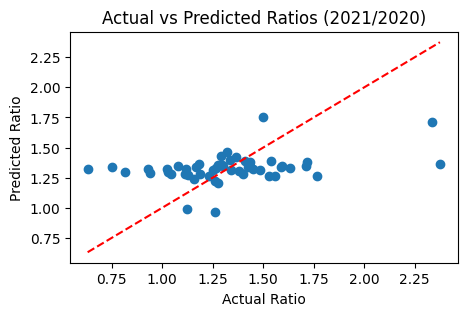

In [ ]:
# Initialize and train the linear regression model
CD_model = LinearRegression()
CD_model.fit(CD_X, CD_y)

# Predict the ratio of 2021/2020 using the trained model
CD_prediction = CD_model.predict(CD_X)

# Calculate and print performance metrics
mse = mean_squared_error(CD_y, CD_prediction)
print("Mean Squared Error:", mse)

# Visualize the predicted vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(CD_y, CD_prediction)
plt.plot([min(CD_y), max(CD_y)], [min(CD_y), max(CD_y)], '--', color='red')
plt.title("Actual vs Predicted Ratios (2021/2020)")
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.show()


The chart presented depicts the comparison between the actual and forecasted ratios of various stocks, with each dot symbolizing a distinct stock, providing a snapshot of our model's predictive efficacy. Evidently, the model's predictions are not particularly precise. The primary use of this graph is to assist in the selection of stocks for future actions.

### CD_Predictions for 2022

In [ ]:
# Calculate the ratios
# Ensure same column names
CD_last_day_of_year['c/p1'] = CD_last_day_of_year[2021] / CD_last_day_of_year[2020]
CD_last_day_of_year['c/p2'] = CD_last_day_of_year[2021] / CD_last_day_of_year[2019]
CD_last_day_of_year['c/p3'] = CD_last_day_of_year[2021] / CD_last_day_of_year[2018]

# Prepare the input features X_CD to predict stock performance for 2022
X_CD = CD_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]


X_CD.head()

,c/p3,c/p2,c/p1
AMZN,2.219978,1.804453,1.023768
APTV,2.714475,1.741282,1.266022
AZO,2.500644,1.759735,1.768449
BBWI,3.633194,4.855809,2.337033
BBY,2.078345,1.218955,1.044393


In [ ]:
# Make predictions using the model
X_CD['Predicted_returns_2022'] = CD_model.predict(X_CD)

X_CD

<ipython-input-103-17e244bb282f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_CD['Predicted_returns_2022'] = CD_model.predict(X_CD)


,c/p3,c/p2,c/p1,Predicted_returns_2022
AMZN,2.219978,1.804453,1.023768,1.178292
APTV,2.714475,1.741282,1.266022,1.210395
AZO,2.500644,1.759735,1.768449,1.397528
BBWI,3.633194,4.855809,2.337033,1.155093
BBY,2.078345,1.218955,1.044393,1.258458
BKNG,1.392941,1.168231,1.077207,1.349132
BWA,1.366768,1.075063,1.183862,1.396360
CZR,2.582988,1.568243,1.259324,1.239657
KMX,2.076040,1.485457,1.378679,1.342541
CCL,0.429957,0.400449,0.928901,1.481329


In [ ]:
sorted_df = X_CD.sort_values(by='Predicted_returns_2022', ascending=False)

# Select the top 3 rows
top_3 = sorted_df.head(3)

print(top_3)


         c/p3      c/p2      c/p1  Predicted_returns_2022
F    2.959353  2.282752  2.374810                1.495585
CCL  0.429957  0.400449  0.928901                1.481329
RCL  0.814049  0.581704  1.029589                1.454652


After analyzing the Consumer Discretionary sector using a regression model, the top three stocks identified are F, CCL, and RCL. These stocks will be incorporated into our portfolio.

## Download CS_dow_prices

In [ ]:
CS_tickers_list = CS_companies['Symbol'].tolist()

CS_dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in CS_tickers_list}

In [ ]:
CS_dow_prices

{'GOOGL':                  open       high        low      close   adjclose    volume  \
 2017-01-03  40.030998  40.571999  39.844501  40.400501  40.400501  39180000   
 2017-01-04  40.494499  40.671501  40.205502  40.388500  40.388500  30306000   
 2017-01-05  40.375000  40.687000  40.296001  40.651001  40.651001  26810000   
 2017-01-06  40.749500  41.448002  40.575001  41.260502  41.260502  40342000   
 2017-01-09  41.318501  41.521500  41.081001  41.359001  41.359001  28178000   
 ...               ...        ...        ...        ...        ...       ...   
 2022-12-23  87.110001  89.550003  87.070000  89.230003  89.230003  23003000   
 2022-12-27  88.800003  88.940002  87.010002  87.389999  87.389999  20097300   
 2022-12-28  86.980003  88.040001  85.940002  86.019997  86.019997  19523200   
 2022-12-29  86.620003  88.849998  86.610001  88.449997  88.449997  23333500   
 2022-12-30  86.980003  88.300003  86.570000  88.230003  88.230003  23986300   
 
            ticker  
 2017-01

### Extract gains from previous day based on adjclose value

In [ ]:
# get the adjclose price for the GOOGL (one stock)
CS_prep_data = pd.DataFrame(CS_dow_prices['GOOGL']['adjclose']).rename(columns = {"adjclose":"GOOGL"})

# combine all the tickers (all the rest of the stocks)
for i in CS_tickers_list[1:]:
  CS_prep_data[i] = pd.DataFrame(CS_dow_prices[i]['adjclose'])
CS_prep_data

,GOOGL,GOOG,T,CHTR,CMCSA,EA,FOXA,FOX,IPG,LYV,...,NFLX,NWSA,NWS,OMC,PARA,TMUS,TTWO,VZ,DIS,WBD
2017-01-03,40.400501,39.306999,18.290026,285.769989,29.339947,77.644676,NaN,NaN,17.769651,27.400000,...,127.489998,10.634436,10.979802,65.958344,54.559452,57.836098,49.220001,37.348450,101.254364,27.959999
2017-01-04,40.388500,39.345001,18.183741,291.549988,29.688374,79.076546,NaN,NaN,17.860353,27.629999,...,129.410004,10.798181,11.162040,66.446831,55.703331,58.331947,50.139999,37.307384,102.552490,28.290001
2017-01-05,40.651001,39.701000,18.132725,296.170013,29.807350,77.438721,NaN,NaN,17.459761,27.500000,...,131.809998,10.816374,11.162040,65.950607,55.483044,57.131992,49.360001,37.389511,102.495216,27.200001
2017-01-06,41.260502,40.307499,17.838621,298.160004,29.858326,77.487770,NaN,NaN,17.867908,27.680000,...,131.070007,10.852764,11.162040,66.532104,54.474728,56.298962,49.950001,36.834846,104.022438,27.480000
2017-01-09,41.359001,40.332500,17.614128,296.260010,30.096283,77.124886,NaN,NaN,17.769651,27.290001,...,130.949997,10.916444,11.298715,66.206482,53.788391,56.199787,50.459999,36.433716,103.430649,26.870001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.230003,89.809998,16.609976,333.920013,33.662758,120.600990,30.030832,28.108047,31.892260,70.690002,...,294.959991,18.037783,18.290117,77.331985,16.227161,138.858200,99.830002,34.627728,87.724098,9.170000
2022-12-27,87.389999,87.930000,16.746048,332.790009,33.528645,119.916153,29.894150,27.922937,32.064030,69.589996,...,284.170013,18.008232,18.290117,78.177338,16.090797,139.820160,99.379997,35.385006,86.089432,9.230000
2022-12-28,86.019997,86.459999,16.528330,332.339996,33.164623,118.645729,29.396242,27.426052,31.415119,68.160004,...,276.880005,17.683138,17.935354,77.456856,15.691450,137.826828,99.690002,34.988335,83.896568,8.870000
2022-12-29,88.449997,88.949997,16.736980,338.940002,33.576542,121.275909,29.835573,27.844994,32.044952,70.150002,...,291.119995,17.949121,18.191572,78.379089,16.334303,138.243347,101.339996,35.394024,86.896797,9.430000


In [ ]:
# Dropping columns with missing values
CS_prep_data.dropna(axis=1, inplace=True)
CS_prep_data

,GOOGL,GOOG,T,CHTR,CMCSA,EA,IPG,LYV,MTCH,META,NFLX,NWSA,NWS,OMC,PARA,TMUS,TTWO,VZ,DIS,WBD
2017-01-03,40.400501,39.306999,18.290026,285.769989,29.339947,77.644676,17.769651,27.400000,16.494013,116.736145,127.489998,10.634436,10.979802,65.958344,54.559452,57.836098,49.220001,37.348450,101.254364,27.959999
2017-01-04,40.388500,39.345001,18.183741,291.549988,29.688374,79.076546,17.860353,27.629999,16.455944,118.564201,129.410004,10.798181,11.162040,66.446831,55.703331,58.331947,50.139999,37.307384,102.552490,28.290001
2017-01-05,40.651001,39.701000,18.132725,296.170013,29.807350,77.438721,17.459761,27.500000,17.122175,120.542099,131.809998,10.816374,11.162040,65.950607,55.483044,57.131992,49.360001,37.389511,102.495216,27.200001
2017-01-06,41.260502,40.307499,17.838621,298.160004,29.858326,77.487770,17.867908,27.680000,17.160246,123.279205,131.070007,10.852764,11.162040,66.532104,54.474728,56.298962,49.950001,36.834846,104.022438,27.480000
2017-01-09,41.359001,40.332500,17.614128,296.260010,30.096283,77.124886,17.769651,27.290001,17.274456,124.767624,130.949997,10.916444,11.298715,66.206482,53.788391,56.199787,50.459999,36.433716,103.430649,26.870001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.230003,89.809998,16.609976,333.920013,33.662758,120.600990,31.892260,70.690002,40.580002,117.914894,294.959991,18.037783,18.290117,77.331985,16.227161,138.858200,99.830002,34.627728,87.724098,9.170000
2022-12-27,87.389999,87.930000,16.746048,332.790009,33.528645,119.916153,32.064030,69.589996,39.180000,116.756119,284.170013,18.008232,18.290117,78.177338,16.090797,139.820160,99.379997,35.385006,86.089432,9.230000
2022-12-28,86.019997,86.459999,16.528330,332.339996,33.164623,118.645729,31.415119,68.160004,39.349998,115.497459,276.880005,17.683138,17.935354,77.456856,15.691450,137.826828,99.690002,34.988335,83.896568,8.870000
2022-12-29,88.449997,88.949997,16.736980,338.940002,33.576542,121.275909,32.044952,70.150002,41.090000,120.132538,291.119995,17.949121,18.191572,78.379089,16.334303,138.243347,101.339996,35.394024,86.896797,9.430000


In [ ]:
# Convert the index to datetime
CS_prep_data.index = pd.to_datetime(CS_prep_data.index)

# Group by year and get the last row of each group
CS_last_day_of_year = CS_prep_data.groupby(CS_prep_data.index.year).last()

print(CS_last_day_of_year)

           GOOGL        GOOG          T        CHTR      CMCSA          EA  \
2017   52.669998   52.320000  17.636545  335.959991  34.461750  103.035858   
2018   52.248001   51.780499  13.972302  284.970001  30.081379   77.389694   
2019   66.969498   66.850998  20.746225  485.079987  40.321850  105.438675   
2020   87.632004   87.594002  16.669712  661.549988  48.037216  141.020996   
2021  144.852005  144.679504  15.686043  651.969971  46.969963  130.175613   
2022   88.230003   88.730003  16.700691  339.100006  33.499908  121.265976   

            IPG         LYV        MTCH        META        NFLX       NWSA  \
2017  15.743572   42.570000   29.799627  176.272980  191.960007  14.978661   
2018  16.699257   49.250000   42.770000  130.951050  267.660004  10.635871   
2019  19.530758   71.470001   82.110001  205.032455  323.570007  13.446298   
2020  20.938744   73.480003  151.190002  272.870483  540.729980  17.372072   
2021  34.484806  119.690002  132.250000  335.993500  602.440002

### Model Parameter ratios

In [ ]:
# Transpose the DataFrame so that columns become rows and vice versa
CS_last_day_of_year = CS_last_day_of_year.transpose()

# Calculate the ratios
CS_last_day_of_year['c/p1'] = CS_last_day_of_year[2020] / CS_last_day_of_year[2019]
CS_last_day_of_year['c/p2'] = CS_last_day_of_year[2020] / CS_last_day_of_year[2018]
CS_last_day_of_year['c/p3'] = CS_last_day_of_year[2020] / CS_last_day_of_year[2017]

# Prepare the input features X and target variable y
CS_X = CS_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]
CS_y = CS_last_day_of_year[2021] / CS_last_day_of_year[2020]

CS_X.head()

,c/p3,c/p2,c/p1
GOOGL,1.663794,1.677232,1.308536
GOOG,1.674197,1.691641,1.310287
T,0.945180,1.193054,0.803506
CHTR,1.969133,2.321472,1.363796
CMCSA,1.393929,1.596909,1.191345


In [ ]:
CS_y.head()

GOOGL    1.652958
GOOG     1.651706
T        0.940991
CHTR     0.985519
CMCSA    0.977783
dtype: float64

### Model building and performance metrics

Mean Squared Error: 0.08679610723370633


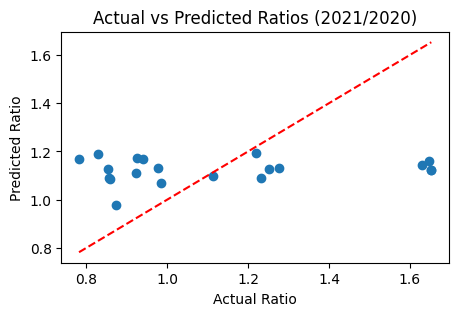

In [ ]:
# Initialize and train the linear regression model
CS_model = LinearRegression()
CS_model.fit(CS_X, CS_y)

# Predict the ratio of 2021/2020 using the trained model
CS_prediction = CS_model.predict(CS_X)

# Calculate and print performance metrics
mse = mean_squared_error(CS_y, CS_prediction)
print("Mean Squared Error:", mse)

# Visualize the predicted vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(CS_y, CS_prediction)
plt.plot([min(CS_y), max(CS_y)], [min(CS_y), max(CS_y)], '--', color='red')
plt.title("Actual vs Predicted Ratios (2021/2020)")
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.show()


The chart presented depicts the comparison between the actual and forecasted ratios of various stocks, with each dot symbolizing a distinct stock, providing a snapshot of our model's predictive efficacy. Evidently, the model's predictions are not particularly precise. The primary use of this graph is to assist in the selection of stocks for future actions.

### CS_Predictions for 2022

In [ ]:
# Calculate the ratios
# Ensure same column names
CS_last_day_of_year['c/p1'] = CS_last_day_of_year[2021] / CS_last_day_of_year[2020]
CS_last_day_of_year['c/p2'] = CS_last_day_of_year[2021] / CS_last_day_of_year[2019]
CS_last_day_of_year['c/p3'] = CS_last_day_of_year[2021] / CS_last_day_of_year[2018]

# Prepare the input features X_CD to predict stock performance for 2022
X_CS = CS_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]


X_CS.head()

,c/p3,c/p2,c/p1
GOOGL,2.772393,2.162955,1.652958
GOOG,2.794093,2.164209,1.651706
T,1.122653,0.756091,0.940991
CHTR,2.287855,1.344046,0.985519
CMCSA,1.561430,1.164876,0.977783


In [ ]:
# Make predictions using the model
X_CS['Predicted_returns_2022'] = CS_model.predict(X_CS)

X_CS

<ipython-input-114-79286dab6ecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_CS['Predicted_returns_2022'] = CS_model.predict(X_CS)


,c/p3,c/p2,c/p1,Predicted_returns_2022
GOOGL,2.772393,2.162955,1.652958,1.084603
GOOG,2.794093,2.164209,1.651706,1.084630
T,1.122653,0.756091,0.940991,1.204597
CHTR,2.287855,1.344046,0.985519,1.160615
CMCSA,1.561430,1.164876,0.977783,1.171979
EA,1.682079,1.234610,0.923094,1.167538
IPG,2.065050,1.765667,1.646938,1.114395
LYV,2.430254,1.674689,1.628879,1.124234
MTCH,3.092121,1.610644,0.874727,1.144020
META,2.565795,1.638733,1.231330,1.133726


In [ ]:
sorted_df = X_CS.sort_values(by='Predicted_returns_2022', ascending=False)

# Select the top 3 rows
top_3 = sorted_df.head(3)

print(top_3)

          c/p3      c/p2      c/p1  Predicted_returns_2022
WBD   0.951496  0.718998  0.782320                1.209114
T     1.122653  0.756091  0.940991                1.204597
PARA  0.743400  0.765522  0.828312                1.203438


After analyzing the Communication Services sector using a regression model, the top three stocks identified are WBD, T, and PARA. These stocks will be incorporated into our portfolio.

## Download IT_dow_prices

In [ ]:
IT_tickers_list = IT_companies['Symbol'].tolist()

IT_dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in IT_tickers_list}

In [ ]:
IT_dow_prices

{'ACN':                   open        high         low       close    adjclose  \
 2017-01-03  117.379997  117.809998  115.820000  116.459999  103.765648   
 2017-01-04  116.910004  117.800003  116.430000  116.739998  104.015114   
 2017-01-05  116.980003  117.139999  114.949997  114.989998  102.455894   
 2017-01-06  114.989998  116.739998  114.339996  116.300003  103.623100   
 2017-01-09  116.139999  116.349998  114.919998  115.000000  102.464806   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  265.790009  266.709991  263.309998  266.089996  259.968933   
 2022-12-27  265.920013  267.220001  263.700012  265.309998  259.206879   
 2022-12-28  266.100006  269.140015  262.670013  263.119995  257.067230   
 2022-12-29  265.589996  270.869995  265.589996  268.380005  262.206268   
 2022-12-30  265.540009  266.890015  262.600006  266.839996  260.701660   
 
              volume ticker  
 2017-01-03  2351600    ACN  
 2017-01-04  2639800    ACN  
 

### Extract gains from previous day based on adjclose value

In [ ]:
# get the adjclose price for the ACN (one stock)
IT_prep_data = pd.DataFrame(IT_dow_prices['ACN']['adjclose']).rename(columns = {"adjclose":"ACN"})

# combine all the tickers (all the rest of the stocks)
for i in IT_tickers_list[1:]:
  IT_prep_data[i] = pd.DataFrame(IT_dow_prices[i]['adjclose'])
IT_prep_data

,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
2017-01-03,103.765648,103.480003,11.430000,67.570000,31.411123,62.940582,93.349998,26.989265,29.370005,24.264999,...,59.369999,60.398483,124.000000,24.323009,60.415073,30.270000,144.770004,77.309998,62.206852,86.250000
2017-01-04,104.015114,104.139999,11.430000,68.330002,31.644035,62.810345,94.440002,26.959063,29.645864,25.432501,...,59.570000,60.144497,124.070000,24.466757,60.341167,30.969999,146.610001,78.959999,63.201370,87.029999
2017-01-05,102.455894,105.910004,11.240000,69.550003,31.476328,61.907597,94.709999,27.096163,29.517130,25.485001,...,59.790001,59.417549,123.360001,24.572184,59.873158,30.490000,148.020004,79.800003,63.210327,84.750000
2017-01-06,103.623100,108.300003,11.320000,69.790001,31.713915,62.150661,93.949997,27.398228,29.461958,25.320000,...,60.000000,59.820461,122.610001,24.581758,60.883083,30.440001,147.789993,80.849998,63.058002,85.959999
2017-01-09,102.464806,108.570000,11.490000,70.000000,31.387825,62.445789,94.290001,27.649179,30.142410,24.879999,...,60.080002,58.953342,121.110001,24.648846,61.039101,30.250000,149.320007,81.820000,64.384033,85.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,259.968933,338.450012,64.519997,83.160004,74.906242,160.024155,237.550003,130.959961,96.164200,119.769997,...,320.209991,111.441566,393.750000,86.081978,158.130951,48.540001,320.119995,203.720001,30.590000,248.220001
2022-12-27,259.206879,335.089996,63.270000,83.500000,75.439819,158.422379,236.860001,129.142441,94.304604,118.860001,...,317.950012,111.353546,397.029999,84.291924,157.553741,49.020000,320.850006,204.070007,31.170000,251.000000
2022-12-28,257.067230,328.329987,62.570000,83.500000,73.997223,156.547073,234.389999,125.179680,93.206673,119.169998,...,315.309998,109.759430,390.690002,83.774796,155.062210,48.560001,314.910004,201.130005,30.209999,246.839996
2022-12-29,262.206268,337.579987,64.820000,84.699997,75.706596,160.160904,243.559998,128.725311,96.085052,121.879997,...,321.980011,113.094360,398.149994,87.006836,158.746613,50.480000,325.470001,205.380005,31.570000,257.529999


In [ ]:
# Dropping columns with missing values
IT_prep_data.dropna(axis=1, inplace=True)
IT_prep_data

,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,SNPS,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,ZBRA
2017-01-03,103.765648,103.480003,11.430000,67.570000,31.411123,62.940582,93.349998,26.989265,29.370005,24.264999,...,59.369999,60.398483,124.000000,24.323009,60.415073,30.270000,144.770004,77.309998,62.206852,86.250000
2017-01-04,104.015114,104.139999,11.430000,68.330002,31.644035,62.810345,94.440002,26.959063,29.645864,25.432501,...,59.570000,60.144497,124.070000,24.466757,60.341167,30.969999,146.610001,78.959999,63.201370,87.029999
2017-01-05,102.455894,105.910004,11.240000,69.550003,31.476328,61.907597,94.709999,27.096163,29.517130,25.485001,...,59.790001,59.417549,123.360001,24.572184,59.873158,30.490000,148.020004,79.800003,63.210327,84.750000
2017-01-06,103.623100,108.300003,11.320000,69.790001,31.713915,62.150661,93.949997,27.398228,29.461958,25.320000,...,60.000000,59.820461,122.610001,24.581758,60.883083,30.440001,147.789993,80.849998,63.058002,85.959999
2017-01-09,102.464806,108.570000,11.490000,70.000000,31.387825,62.445789,94.290001,27.649179,30.142410,24.879999,...,60.080002,58.953342,121.110001,24.648846,61.039101,30.250000,149.320007,81.820000,64.384033,85.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,259.968933,338.450012,64.519997,83.160004,74.906242,160.024155,237.550003,130.959961,96.164200,119.769997,...,320.209991,111.441566,393.750000,86.081978,158.130951,48.540001,320.119995,203.720001,30.590000,248.220001
2022-12-27,259.206879,335.089996,63.270000,83.500000,75.439819,158.422379,236.860001,129.142441,94.304604,118.860001,...,317.950012,111.353546,397.029999,84.291924,157.553741,49.020000,320.850006,204.070007,31.170000,251.000000
2022-12-28,257.067230,328.329987,62.570000,83.500000,73.997223,156.547073,234.389999,125.179680,93.206673,119.169998,...,315.309998,109.759430,390.690002,83.774796,155.062210,48.560001,314.910004,201.130005,30.209999,246.839996
2022-12-29,262.206268,337.579987,64.820000,84.699997,75.706596,160.160904,243.559998,128.725311,96.085052,121.879997,...,321.980011,113.094360,398.149994,87.006836,158.746613,50.480000,325.470001,205.380005,31.570000,257.529999


In [ ]:
# Convert the index to datetime
IT_prep_data.index = pd.to_datetime(IT_prep_data.index)

# Group by year and get the last row of each group
IT_last_day_of_year = IT_prep_data.groupby(IT_prep_data.index.year).last()

print(IT_last_day_of_year)

             ACN        ADBE         AMD        AKAM        APH         ADI  \
2017  139.152832  175.240005   10.280000   65.040001  41.260975   78.984993   
2018  130.485443  226.240005   18.459999   61.080002  38.445282   77.690331   
2019  197.311752  329.809998   45.860001   86.379997  51.865509  109.783798   
2020  248.692535  500.119995   91.709999  104.989998  63.321941  139.286255   
2021  399.562775  567.059998  143.899994  117.040001  85.448425  168.486298   
2022  260.701660  336.529999   64.769997   84.300003  75.232315  160.209732   

            ANSS        AAPL        AMAT        ANET  ...        SNPS  \
2017  147.589996   39.955601   47.436359   58.895000  ...   85.239998   
2018  142.940002   37.801903   30.870642   52.674999  ...   84.239998   
2019  257.410004   71.429649   58.609505   50.849998  ...  139.199997   
2020  363.799988  130.221069   83.981544   72.642502  ...  259.239990   
2021  401.119995  175.340332  154.221085  143.750000  ...  368.500000   
2022  24

### Model Parameter ratios

In [ ]:
# Transpose the DataFrame so that columns become rows and vice versa
IT_last_day_of_year = IT_last_day_of_year.transpose()

# Calculate the ratios
IT_last_day_of_year['c/p1'] = IT_last_day_of_year[2020] / IT_last_day_of_year[2019]
IT_last_day_of_year['c/p2'] = IT_last_day_of_year[2020] / IT_last_day_of_year[2018]
IT_last_day_of_year['c/p3'] = IT_last_day_of_year[2020] / IT_last_day_of_year[2017]

# Prepare the input features X and target variable y
IT_X = IT_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]
IT_y = IT_last_day_of_year[2021] / IT_last_day_of_year[2020]

IT_X.head()

,c/p3,c/p2,c/p1
ACN,1.787190,1.905903,1.260404
ADBE,2.853915,2.210573,1.516388
AMD,8.921206,4.968039,1.999782
AKAM,1.614237,1.718893,1.215443
APH,1.534669,1.647067,1.220887


In [ ]:
IT_y.head()

ACN     1.606654
ADBE    1.133848
AMD     1.569076
AKAM    1.114773
APH     1.349428
dtype: float64

### Model building and performance metrics

Mean Squared Error: 0.10462467794924332


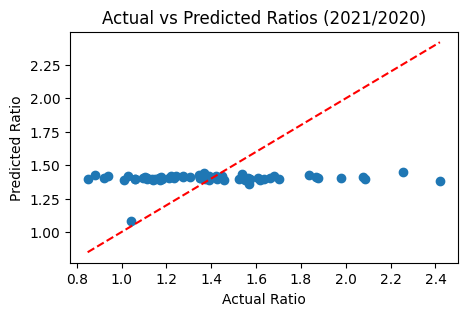

In [ ]:
# Initialize and train the linear regression model
IT_model = LinearRegression()
IT_model.fit(IT_X, IT_y)

# Predict the ratio of 2021/2020 using the trained model
IT_prediction = IT_model.predict(IT_X)

# Calculate and print performance metrics
mse = mean_squared_error(IT_y, IT_prediction)
print("Mean Squared Error:", mse)

# Visualize the predicted vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(IT_y, IT_prediction)
plt.plot([min(IT_y), max(IT_y)], [min(IT_y), max(IT_y)], '--', color='red')
plt.title("Actual vs Predicted Ratios (2021/2020)")
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.show()


The graph above only shows the Actual vs Predicted ratios of different stock, each dot representing different stock, to give us an idea of our model performance. Clearly, the model is not predicting accurately. This is used just to pick the stocks for our next steps.

### IT_Predictions for 2022

In [ ]:
# Calculate the ratios
# Ensure same column names
IT_last_day_of_year['c/p1'] = IT_last_day_of_year[2021] / IT_last_day_of_year[2020]
IT_last_day_of_year['c/p2'] = IT_last_day_of_year[2021] / IT_last_day_of_year[2019]
IT_last_day_of_year['c/p3'] = IT_last_day_of_year[2021] / IT_last_day_of_year[2018]

# Prepare the input features X_CD to predict stock performance for 2022
X_IT = IT_last_day_of_year[['c/p3', 'c/p2', 'c/p1']]


X_IT.head()

,c/p3,c/p2,c/p1
ACN,3.062125,2.025033,1.606654
ADBE,2.506453,1.719354,1.133848
AMD,7.795233,3.137811,1.569076
AKAM,1.916175,1.354943,1.114773
APH,2.222598,1.647500,1.349428


In [ ]:
# Make predictions using the model
X_IT['Predicted_returns_2022'] = IT_model.predict(X_IT)

X_IT

<ipython-input-125-5cb735350597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_IT['Predicted_returns_2022'] = IT_model.predict(X_IT)


,c/p3,c/p2,c/p1,Predicted_returns_2022
ACN,3.062125,2.025033,1.606654,1.387863
ADBE,2.506453,1.719354,1.133848,1.386295
AMD,7.795233,3.137811,1.569076,1.330475
AKAM,1.916175,1.354943,1.114773,1.387311
APH,2.222598,1.647500,1.349428,1.391248
...,...,...,...,...
TRMB,2.649347,2.091389,1.305826,1.394836
TYL,2.895006,1.793047,1.232361,1.381902
VRSN,1.711646,1.317314,1.172921,1.390503
WDC,1.858463,1.049138,1.177288,1.380773


In [ ]:
sorted_df = X_IT.sort_values(by='Predicted_returns_2022', ascending=False)

# Select the top 3 rows
top_3 = sorted_df.head(3)

print(top_3)

          c/p3      c/p2      c/p1  Predicted_returns_2022
ANET  2.728999  2.826942  1.978869                1.417997
FFIV  1.510276  1.752309  1.390872                1.407351
JNPR  1.458605  1.546099  1.633358                1.404722


After analyzing the Information Technology sector using a regression model, the top three stocks identified are ANET, FFIV, and JNPR. These stocks will be incorporated into our portfolio.

# Visualize the Time Series

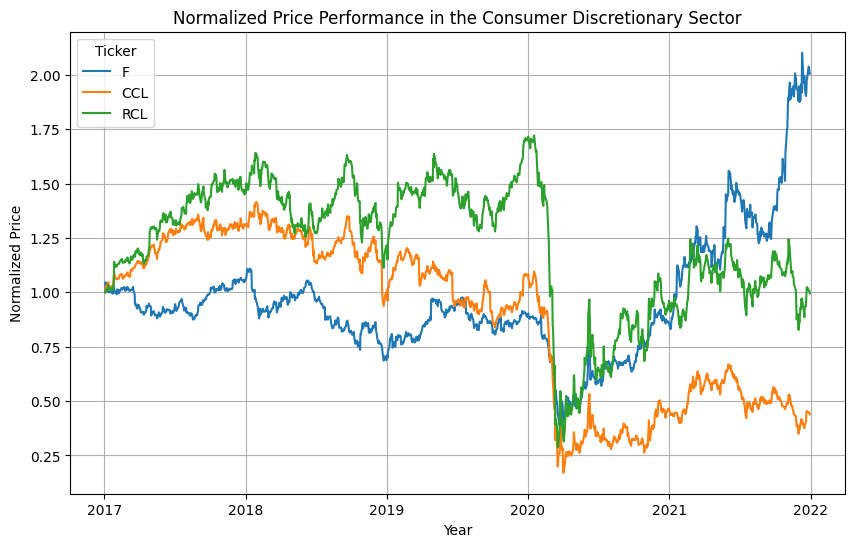

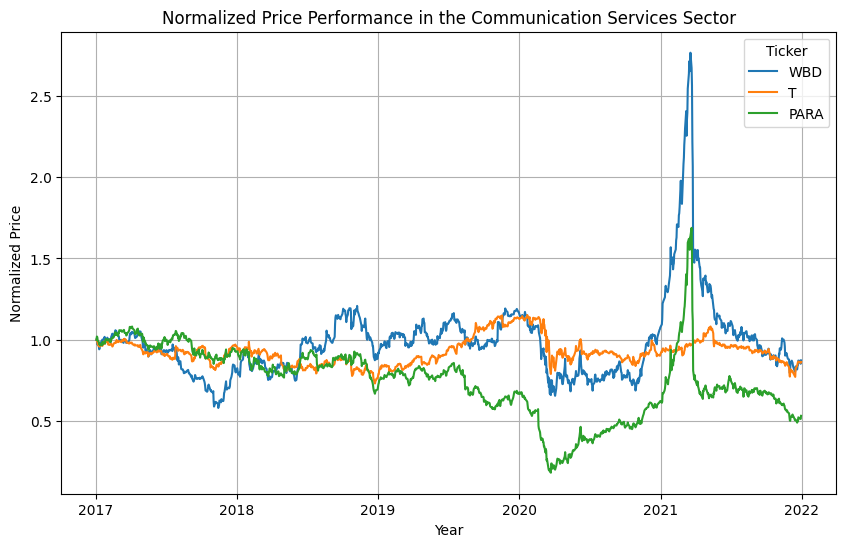

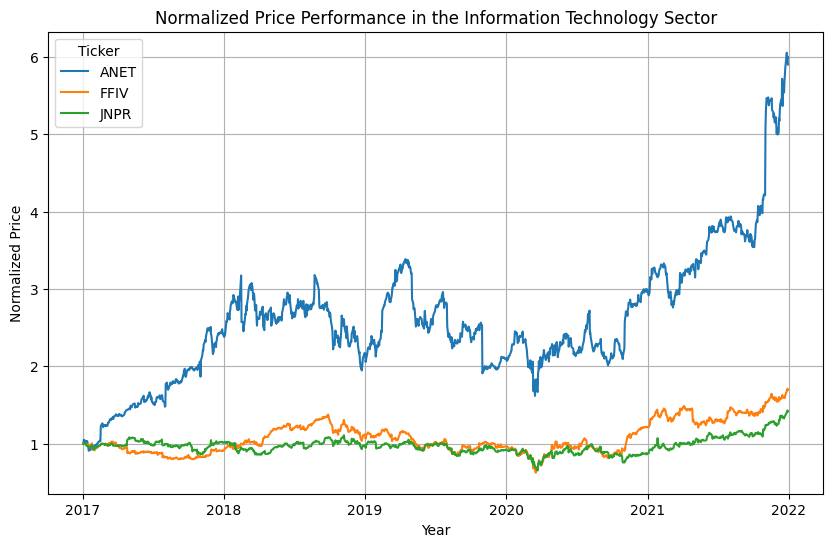

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

def fetch_and_plot(tickers, sector_name):
    # Initialize DataFrame to store adjusted close prices
    prices = pd.DataFrame()

    # Fetch historical data for each ticker
    for ticker in tickers:
        stock_data = yf.Ticker(ticker).history(start="2017-01-01", end="2021-12-31")
        prices[ticker] = stock_data['Close']

    # Normalize prices to start at 1
    normalized_prices = prices / prices.iloc[0]

    # Plotting
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)
    plt.title(f"Normalized Price Performance in the {sector_name} Sector")
    plt.xlabel("Year")
    plt.ylabel("Normalized Price")
    plt.legend(title="Ticker")
    plt.grid(True)
    plt.show()

# Sector assignments
cd_tickers = ['F', 'CCL', 'RCL']  # Consumer Discretionary
cs_tickers = ['WBD', 'T', 'PARA']  # Communication Services
it_tickers = ['ANET', 'FFIV', 'JNPR']  # Information Technology

# Execute plotting for each sector
fetch_and_plot(cd_tickers, "Consumer Discretionary")
fetch_and_plot(cs_tickers, "Communication Services")
fetch_and_plot(it_tickers, "Information Technology")


## Sector-Wise Stock Performance Analysis

### Consumer Discretionary Sector (First Image):
- **Volatility:** The Consumer Discretionary sector exhibited significant volatility over the observed period.
- **Ford Motor Co. (F):** A steady performance was disrupted in 2020 due to the pandemic, with a notable upward trend from 2021, potentially reflecting a shift towards electric vehicle production and a post-pandemic market recovery.
- **Cruise Lines (CCL and RCL):** Experienced a precipitous drop in 2020, underscoring the severe impact of COVID-19 on travel. Signs of recovery are evident as restrictions eased, albeit at varied rates.

### Communication Services Sector (Second Image):
- **Market Dynamics:** This sector experienced dramatic fluctuations. Notably, WBD saw spikes and drops, possibly attributed to significant corporate developments or market responses to strategic decisions.
- **AT&T (T):** The downtrend, followed by a mild recovery, may indicate the challenges faced in a competitive telecommunications landscape and evolving media sector.
- **Paramount Global (PARA):** The sharp decline and subsequent volatility may reflect adjustments to pandemic-induced changes in media consumption and strategic shifts towards digital platforms.

### Information Technology Sector (Third Image):
- **Robust Growth:** Arista Networks (ANET) demonstrated strong and consistent growth, potentially driven by increasing demands for cloud networking and digital infrastructure enhancements.
- **Positive Trends:** Both F5 Networks (FFIV) and Juniper Networks (JNPR) exhibited growth trends, which may be attributed to the ongoing need for advanced IT infrastructure and security solutions.
- **Sector's Critical Role:** The marked performance in later years suggests the vital role of IT companies in facilitating the transition to remote work and the expansion of digital services.

### General Observations:
- **Impact of COVID-19:** The year 2020 emerged as a crucial inflection point due to the pandemic's disruptions, leading to varying recovery trajectories across sectors as companies adapted to the new normal.
- **Resilience and Growth:** Diverse resilience levels and growth patterns were observed within sectors, highlighting the nuanced impact of sector-specific trends and the broader economic landscape on stock performances.


# 2 - Optimization Model

## Installing modules and slover

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt'
except:
    pass

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'

# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path
from pyomo.environ import *

executable = '/content/bin/bonmin'

In [ ]:
%matplotlib inline
from pylab import *
# helpful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

## Downloading stock data and calculating returns

In [ ]:
#data retrieval FOR THE TOP 3 STOCKS FROM EACH SECTOR

# Assign the ticker list that we to collect from a data source
tickers_list = ['F','CCL','RCL','WBD','T','PARA','ANET','FFIV','JNPR']
# Retrieve historical price data for each stock, which will later be matched up with a news score
dow_price = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}
dow_price

{'F':                  open       high        low      close   adjclose    volume  \
 2017-01-03  12.200000  12.600000  12.130000  12.590000   8.708389  40510800   
 2017-01-04  12.770000  13.270000  12.740000  13.170000   9.109571  77638100   
 2017-01-05  13.210000  13.220000  12.630000  12.770000   8.832895  75628400   
 2017-01-06  12.800000  12.840000  12.640000  12.760000   8.825975  40315900   
 2017-01-09  12.790000  12.860000  12.630000  12.630000   8.736058  39438400   
 ...               ...        ...        ...        ...        ...       ...   
 2021-12-23  20.080000  20.410000  20.000000  20.250000  17.280903  50610500   
 2021-12-27  20.260000  20.889999  20.100000  20.799999  17.750261  59651800   
 2021-12-28  20.660000  21.059999  20.590000  20.760000  17.716124  53020500   
 2021-12-29  20.709999  20.770000  20.450001  20.559999  17.545448  37883000   
 2021-12-30  20.590000  20.959999  20.469999  20.469999  17.468643  51470100   
 
            ticker  
 2017-01-03 

In [ ]:
# get the adjclose price for the ACN (one stock)
df = pd.DataFrame(dow_price['F']['adjclose']).rename(columns = {"adjclose":"F"})

# combine all the tickers (all the rest of the stocks)
for i in tickers_list[1:]:
  df[i] = pd.DataFrame(dow_price[i]['adjclose'])
df

,F,CCL,RCL,WBD,T,PARA,ANET,FFIV,JNPR
2017-01-03,8.708389,46.789986,77.689896,27.959999,18.290028,54.559456,24.264999,144.800003,23.479193
2017-01-04,9.109571,47.400211,78.273491,28.290001,18.183741,55.703342,25.432501,145.460007,23.725471
2017-01-05,8.832895,48.198891,78.736633,27.200001,18.132721,55.483044,25.485001,144.419998,23.676214
2017-01-06,8.825975,48.145058,78.116005,27.480000,17.838619,54.474724,25.320000,144.449997,23.692635
2017-01-09,8.736058,48.180954,78.319801,26.870001,17.614128,53.788383,24.879999,144.149994,23.306789
...,...,...,...,...,...,...,...,...,...
2021-12-23,17.280903,21.200001,79.529999,24.420000,15.858211,28.625820,141.850006,234.839996,32.055622
2021-12-27,17.750261,20.950001,78.459999,24.360001,15.800817,28.195217,146.839996,243.320007,32.976059
2021-12-28,17.716124,20.900000,78.250000,24.330000,15.826325,28.195217,144.889999,246.710007,33.276608
2021-12-29,17.545448,20.790001,78.220001,23.870001,15.711547,28.073521,145.710007,247.779999,33.595936


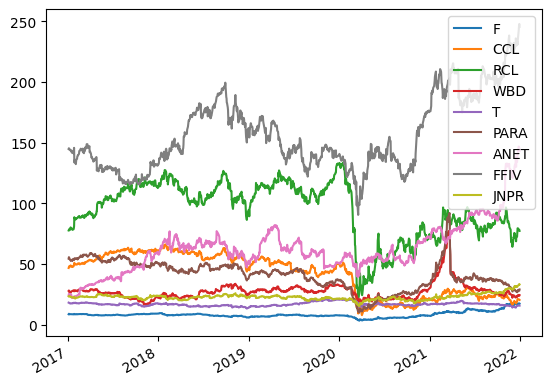

<Figure size 800x1500 with 0 Axes>

In [ ]:
df.plot()
plt.figure(figsize=(8, 15))
plt.show()

In [ ]:
# create return features for each ticker,
# using pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = df[i].pct_change()
# drop na records
return_data.dropna(inplace=True)
return_data

,F,CCL,RCL,WBD,T,PARA,ANET,FFIV,JNPR
2017-01-04,0.046068,0.013042,0.007512,0.011803,-0.005811,0.020966,0.048115,0.004558,0.010489
2017-01-05,-0.030372,0.016850,0.005917,-0.038530,-0.002806,-0.003955,0.002064,-0.007150,-0.002076
2017-01-06,-0.000783,-0.001117,-0.007882,0.010294,-0.016219,-0.018173,-0.006474,0.000208,0.000694
2017-01-09,-0.010188,0.000746,0.002609,-0.022198,-0.012585,-0.012599,-0.017378,-0.002077,-0.016285
2017-01-10,0.017419,0.010430,0.016322,-0.019725,0.000245,-0.012445,0.009043,0.000624,0.000352
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.005462,-0.002353,0.000881,0.033432,0.003632,0.047978,0.016627,0.017020,0.008570
2021-12-27,0.027161,-0.011792,-0.013454,-0.002457,-0.003619,-0.015042,0.035178,0.036110,0.028714
2021-12-28,-0.001923,-0.002387,-0.002677,-0.001232,0.001614,0.000000,-0.013280,0.013932,0.009114
2021-12-29,-0.009634,-0.005263,-0.000383,-0.018907,-0.007252,-0.004316,0.005660,0.004337,0.009596


## Covariance

In [ ]:
#covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,F,CCL,RCL,WBD,T,PARA,ANET,FFIV,JNPR
F,0.000536,0.000450,0.000441,0.000235,0.000152,0.000310,0.000157,0.000144,0.000152
CCL,0.000450,0.001507,0.001256,0.000369,0.000210,0.000473,0.000209,0.000258,0.000198
RCL,0.000441,0.001256,0.001368,0.000372,0.000202,0.000482,0.000226,0.000228,0.000183
WBD,0.000235,0.000369,0.000372,0.000681,0.000166,0.000510,0.000108,0.000115,0.000125
T,0.000152,0.000210,0.000202,0.000166,0.000223,0.000167,0.000098,0.000082,0.000098
PARA,0.000310,0.000473,0.000482,0.000510,0.000167,0.000837,0.000150,0.000124,0.000169
ANET,0.000157,0.000209,0.000226,0.000108,0.000098,0.000150,0.000747,0.000208,0.000213
FFIV,0.000144,0.000258,0.000228,0.000115,0.000082,0.000124,0.000208,0.000338,0.000168
JNPR,0.000152,0.000198,0.000183,0.000125,0.000098,0.000169,0.000213,0.000168,0.000293


A lower covariance between stocks indicates that they don't move in sync with each other. This is beneficial because it means that when one stock's price goes up, another's might not necessarily follow suit. Therefore, holding a mix of stocks with low covariance helps diversify the portfolio, reducing overall risk.

Stocks F and CCL have a covariance of 0.000450, indicating a positive relationship in their price movements. Both companies operate in consumer-related industries but have different exposures, with Ford in the automotive sector and Carnival in the travel and leisure industry. Investing in both stocks could provide diversification benefits while maintaining exposure to consumer-related sectors.

The covariance between AT&T and JNPR is 0.000082, suggesting a positive relationship in their returns. Although they are in different sectors, their covariance indicates some degree of correlation, making them a potentially complementary pair for portfolio diversification.

ANET and FFIV have a covariance of 0.000208, indicating a positive relationship in their price movements. Investing in both stocks could offer exposure to the growth potential of the networking sector while spreading risk through diversification.

## Correlation Matrix

In [ ]:
#correlation matrix
Corr_matrix = return_data.corr()
Corr_matrix

,F,CCL,RCL,WBD,T,PARA,ANET,FFIV,JNPR
F,1.000000,0.500368,0.515085,0.388210,0.439866,0.462614,0.247922,0.336906,0.383042
CCL,0.500368,1.000000,0.874803,0.364552,0.363115,0.421207,0.196902,0.360929,0.298134
RCL,0.515085,0.874803,1.000000,0.384887,0.365978,0.450493,0.223779,0.335146,0.288358
WBD,0.388210,0.364552,0.384887,1.000000,0.425844,0.676062,0.151501,0.239452,0.278715
T,0.439866,0.363115,0.365978,0.425844,1.000000,0.386594,0.241316,0.297376,0.381913
PARA,0.462614,0.421207,0.450493,0.676062,0.386594,1.000000,0.189216,0.233391,0.341983
ANET,0.247922,0.196902,0.223779,0.151501,0.241316,0.189216,1.000000,0.414103,0.455021
FFIV,0.336906,0.360929,0.335146,0.239452,0.297376,0.233391,0.414103,1.000000,0.532751
JNPR,0.383042,0.298134,0.288358,0.278715,0.381913,0.341983,0.455021,0.532751,1.000000


A correlation close to 1 indicates a strong positive relationship between two stocks, while a correlation close to -1 suggests a strong negative relationship. In this correlation matrix, we observe moderate to high positive correlations between most stocks. However, some pairs, like WBD and T, exhibit lower correlations, indicating potential diversification benefits from holding these stocks together.

In [ ]:
# average of each stock
# These coefficients represent the objective function.
df_return = return_data.mean()
print('Average Return:')
print(df_return)

# Create covariance table on stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # returns a new line

Average Return:
F       0.000819
CCL     0.000113
RCL     0.000686
WBD     0.000241
T      -0.000005
PARA   -0.000074
ANET    0.001788
FFIV    0.000590
JNPR    0.000423
dtype: float64
Covariance Matrix:
             F       CCL       RCL       WBD         T      PARA      ANET  \
F     0.000536  0.000450  0.000441  0.000235  0.000152  0.000310  0.000157   
CCL   0.000450  0.001507  0.001256  0.000369  0.000210  0.000473  0.000209   
RCL   0.000441  0.001256  0.001368  0.000372  0.000202  0.000482  0.000226   
WBD   0.000235  0.000369  0.000372  0.000681  0.000166  0.000510  0.000108   
T     0.000152  0.000210  0.000202  0.000166  0.000223  0.000167  0.000098   
PARA  0.000310  0.000473  0.000482  0.000510  0.000167  0.000837  0.000150   
ANET  0.000157  0.000209  0.000226  0.000108  0.000098  0.000150  0.000747   
FFIV  0.000144  0.000258  0.000228  0.000115  0.000082  0.000124  0.000208   
JNPR  0.000152  0.000198  0.000183  0.000125  0.000098  0.000169  0.000213   

          FFIV  

##Infeasible Region

### Defining Optimization Model and constraints

In [ ]:
from pyomo.environ import *

# Create a Pyomo model
im = ConcreteModel()

# Defining variables
# Each one is a stock ('F','CCL','RCL','WBD','T','PARA','ANET','FFIV','JNPR')
# CD Sector('F','CCL','RCL')
im.F = Var(within=NonNegativeReals, bounds=(0, 1))
im.CCL = Var(within=NonNegativeReals, bounds=(0, 1))
im.RCL = Var(within=NonNegativeReals, bounds=(0, 1))
# CS sector('WBD','T','PARA')
im.WBD = Var(within=NonNegativeReals, bounds=(0, 1))
im.T = Var(within=NonNegativeReals, bounds=(0, 1))
im.PARA = Var(within=NonNegativeReals, bounds=(0, 1))
# IT sector('ANET','FFIV','JNPR')
im.ANET = Var(within=NonNegativeReals, bounds=(0, 1))
im.FFIV = Var(within=NonNegativeReals, bounds=(0, 1))
im.JNPR = Var(within=NonNegativeReals, bounds=(0, 1))

# Binary activation variables for each stock
im.activate_F = Var(within=Binary)
im.activate_CCL = Var(within=Binary)
im.activate_RCL = Var(within=Binary)
im.activate_WBD = Var(within=Binary)
im.activate_T = Var(within=Binary)
im.activate_PARA = Var(within=Binary)
im.activate_ANET = Var(within=Binary)
im.activate_FFIV = Var(within=Binary)
im.activate_JNPR = Var(within=Binary)

# Define objective function
im.objective = Objective(expr =
                        im.F * df_return[0] +
                        im.CCL * df_return[1] +
                        im.RCL * df_return[2] +
                        im.WBD * df_return[3] +
                        im.T * df_return[4] +
                        im.PARA * df_return[5] +
                        im.ANET * df_return[6] +
                        im.FFIV * df_return[7] +
                        im.JNPR * df_return[8],
                        sense=maximize)

# Declare constraints
# Sum of all proportions = 1
im.sum_proportions = Constraint(expr =
                               im.F + im.CCL + im.RCL + im.WBD + im.T + im.PARA + im.ANET + im.FFIV + im.JNPR == 1)

# Set maximum risk
im.total_risk = Constraint(expr =
                          im.F + im.CCL + im.RCL + im.WBD + im.T + im.PARA + im.ANET + im.FFIV + im.JNPR >= 0.0)

# Minimum allocation constraints (soft)

# At least one stock per sector selected constraint (softened version for continuous solver)
# Sector 1: F, CCL, RCL
im.sector1 = Constraint(expr = im.activate_F + im.activate_CCL + im.activate_RCL >= 1)
# Sector 2: WBD, T, PARA
im.sector2 = Constraint(expr = im.activate_WBD + im.activate_T + im.activate_PARA >= 1)
# Sector 3: ANET, FFIV, JNPR
im.sector3 = Constraint(expr = im.activate_ANET + im.activate_FFIV + im.activate_JNPR >= 1)

# Activation constraints: If activated, allocation must be at least 2%
im.min_allocation_constraint_F = Constraint(expr = im.F >= 0.02 * im.activate_F)
im.min_allocation_constraint_CCL = Constraint(expr = im.CCL >= 0.02 * im.activate_CCL)
im.min_allocation_constraint_RCL = Constraint(expr = im.RCL >= 0.02 * im.activate_RCL)
im.min_allocation_constraint_WBD = Constraint(expr = im.WBD >= 0.02 * im.activate_WBD)
im.min_allocation_constraint_T = Constraint(expr = im.T >= 0.02 * im.activate_T)
im.min_allocation_constraint_PARA = Constraint(expr = im.PARA >= 0.02 * im.activate_PARA)
im.min_allocation_constraint_ANET = Constraint(expr = im.ANET >= 0.02 * im.activate_ANET)
im.min_allocation_constraint_FFIV = Constraint(expr = im.FFIV >= 0.02 * im.activate_FFIV)
im.min_allocation_constraint_JNPR = Constraint(expr = im.JNPR >= 0.02 * im.activate_JNPR)


In [ ]:
# Creating calculations table for calculate the risk
# Calculate risk
def calc_risk(im):
  variables = im.F, im.CCL, im.RCL, im.WBD, im.T, im.PARA, im.ANET, im.FFIV, im.JNPR
  risk_exp_if = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp_if += variables[i]*df_cov.at[tickers_list[i],tickers_list[j]]*variables[j]
  return risk_exp_if

# Using the below expression to compute risk
expr_risk_if = calc_risk(im)

# Risk Levels
min_risk_if = 0.00005
max_risk_if = 0.00015
step_if = 0.000005
# Sequence of risk levels
risk_limits_if = np.arange(min_risk_if, max_risk_if, step_if) # take tiny steps
risk_limits_if

array([5.00e-05, 5.50e-05, 6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05,
       8.00e-05, 8.50e-05, 9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04,
       1.10e-04, 1.15e-04, 1.20e-04, 1.25e-04, 1.30e-04, 1.35e-04,
       1.40e-04, 1.45e-04])

In [ ]:
#print risk limit size
print(risk_limits_if.size)

20


In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'

# import modules
%matplotlib inline
from pylab import *
import shutil
import sys
import os.path
from pyomo.environ import *


In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# Updating risk contraint for each limit and then solving the problem
parameter_analysis_if = {} # key=risk, value =stock allocations
returns_if = {} # key=risk, value = return
for r in risk_limits_if:
  # Remove constraint to avoid error messages
  im.del_component(im.total_risk)
  im.total_risk = Constraint(expr = expr_risk_if <= r)
  result_if = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(im)

  # If solution is not feasible, ignore this run
  if result_if.solver.termination_condition != TerminationCondition.optimal:
    continue

  result_if = result_if.write()

  # Store our allocation proportions
  parameter_analysis_if[r] = [im.F(), im.CCL(), im.RCL(), im.WBD(), im.T(), im.PARA(), im.ANET(), im.FFIV(), im.JNPR()]
  # Store our returns
  returns_if[r] = [im.F() * df_return[0] + im.CCL() * df_return[1] + im.RCL() * df_return[2] +
                  im.WBD() * df_return[3] + im.T() * df_return[4] + im.PARA() * df_return[5] +
                  im.ANET() * df_return[6] + im.FFIV() * df_return[7] + im.JNPR() * df_return[8]]


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\

In this section of our project, we constructed an optimization model using the Pyomo library. This model was designed to strategically allocate investments across a selection of stocks from three distinct sectors: Consumer Discretionary, Communication Services, and Information Technology.

The model is meticulously defined within a Pyomo ConcreteModel, where each stock is represented by a variable. These variables are restricted to non-negative real numbers, reflecting the practical aspect that an investor cannot hold a negative quantity of stock, and are bounded within the interval [0,1], indicating the fraction of the total investment allocated to each stock.

To enforce a realistic investment threshold, we introduced binary activation variables alongside each stock variable. These serve a dual purpose: they act as gates, ensuring that if a stock is included in the portfolio, it must constitute at least a 2% share, a condition that encourages diversification and mitigates risk concentration.

The objective function of our model is formulated to maximize the weighted sum of the selected stocks' projected returns, with the weights being the decision variables representing the proportion of the total investment. This function is a direct translation of our aim to maximize the portfolio's expected return.

**Infeasible Solution**

However, our computational results, indicated by the solver's warnings, showed a series of infeasible solutions across various risk levels. These messages from the Bonmin solver suggest that the interplay between our constraints and the selected risk levels did not yield a viable investment strategy within the predefined bounds.

The inference here is twofold. On the technical front, there is an indication that the solver's inability to find a feasible solution may stem from overly restrictive constraints or a covariance matrix, df_cov, that suggests high risk for the given stock combinations. On the optimization front, it's a clear signal that our model requires recalibration.

## Feasible region

### Defining Optimization Model and constraints

In [ ]:
from pyomo.environ import *

# Create a Pyomo model
m = ConcreteModel()

# Defining variables
# Each one is a stock ('F','CCL','RCL','WBD','T','PARA','ANET','FFIV','JNPR')
# CD Sector('F','CCL','RCL')
m.F = Var(within=NonNegativeReals, bounds=(0, 1))
m.CCL = Var(within=NonNegativeReals, bounds=(0, 1))
m.RCL = Var(within=NonNegativeReals, bounds=(0, 1))
# CS sector('WBD','T','PARA')
m.WBD = Var(within=NonNegativeReals, bounds=(0, 1))
m.T = Var(within=NonNegativeReals, bounds=(0, 1))
m.PARA = Var(within=NonNegativeReals, bounds=(0, 1))
# IT sector('ANET','FFIV','JNPR')
m.ANET = Var(within=NonNegativeReals, bounds=(0, 1))
m.FFIV = Var(within=NonNegativeReals, bounds=(0, 1))
m.JNPR = Var(within=NonNegativeReals, bounds=(0, 1))

# Binary activation variables for each stock
m.activate_F = Var(within=Binary)
m.activate_CCL = Var(within=Binary)
m.activate_RCL = Var(within=Binary)
m.activate_WBD = Var(within=Binary)
m.activate_T = Var(within=Binary)
m.activate_PARA = Var(within=Binary)
m.activate_ANET = Var(within=Binary)
m.activate_FFIV = Var(within=Binary)
m.activate_JNPR = Var(within=Binary)

# Define objective function
m.objective = Objective(expr =
                        m.F * df_return[0] +
                        m.CCL * df_return[1] +
                        m.RCL * df_return[2] +
                        m.WBD * df_return[3] +
                        m.T * df_return[4] +
                        m.PARA * df_return[5] +
                        m.ANET * df_return[6] +
                        m.FFIV * df_return[7] +
                        m.JNPR * df_return[8],
                        sense=maximize)

# Declare constraints
# Sum of all proportions = 1
m.sum_proportions = Constraint(expr =
                               m.F + m.CCL + m.RCL + m.WBD + m.T + m.PARA + m.ANET + m.FFIV + m.JNPR == 1)

# Set maximum risk
m.total_risk = Constraint(expr =
                          m.F + m.CCL + m.RCL + m.WBD + m.T + m.PARA + m.ANET + m.FFIV + m.JNPR >= 0.0)

# Minimum allocation constraints (soft)

# At least one stock per sector selected constraint (softened version for continuous solver)
# Sector 1: F, CCL, RCL
m.sector1 = Constraint(expr = m.activate_F + m.activate_CCL + m.activate_RCL >= 1)
# Sector 2: WBD, T, PARA
m.sector2 = Constraint(expr = m.activate_WBD + m.activate_T + m.activate_PARA >= 1)
# Sector 3: ANET, FFIV, JNPR
m.sector3 = Constraint(expr = m.activate_ANET + m.activate_FFIV + m.activate_JNPR >= 1)

# Activation constraints: If activated, allocation must be at least 2%
m.min_allocation_constraint_F = Constraint(expr = m.F >= 0.02 * m.activate_F)
m.min_allocation_constraint_CCL = Constraint(expr = m.CCL >= 0.02 * m.activate_CCL)
m.min_allocation_constraint_RCL = Constraint(expr = m.RCL >= 0.02 * m.activate_RCL)
m.min_allocation_constraint_WBD = Constraint(expr = m.WBD >= 0.02 * m.activate_WBD)
m.min_allocation_constraint_T = Constraint(expr = m.T >= 0.02 * m.activate_T)
m.min_allocation_constraint_PARA = Constraint(expr = m.PARA >= 0.02 * m.activate_PARA)
m.min_allocation_constraint_ANET = Constraint(expr = m.ANET >= 0.02 * m.activate_ANET)
m.min_allocation_constraint_FFIV = Constraint(expr = m.FFIV >= 0.02 * m.activate_FFIV)
m.min_allocation_constraint_JNPR = Constraint(expr = m.JNPR >= 0.02 * m.activate_JNPR)


In [ ]:
# Creating calculations table for calculate the risk
# Calculate risk
def calc_risk(m):
  variables = m.F, m.CCL, m.RCL, m.WBD, m.T, m.PARA, m.ANET, m.FFIV, m.JNPR
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers_list[i],tickers_list[j]]*variables[j]
  return risk_exp

# Using this expression to compute risk
expr_risk = calc_risk(m)

min_risk = 0.00015
max_risk = 0.00085
step = 0.000005
# Sequence of risk levels
risk_limits = np.arange(min_risk, max_risk, step) # take tiny steps
risk_limits

array([0.00015 , 0.000155, 0.00016 , 0.000165, 0.00017 , 0.000175,
       0.00018 , 0.000185, 0.00019 , 0.000195, 0.0002  , 0.000205,
       0.00021 , 0.000215, 0.00022 , 0.000225, 0.00023 , 0.000235,
       0.00024 , 0.000245, 0.00025 , 0.000255, 0.00026 , 0.000265,
       0.00027 , 0.000275, 0.00028 , 0.000285, 0.00029 , 0.000295,
       0.0003  , 0.000305, 0.00031 , 0.000315, 0.00032 , 0.000325,
       0.00033 , 0.000335, 0.00034 , 0.000345, 0.00035 , 0.000355,
       0.00036 , 0.000365, 0.00037 , 0.000375, 0.00038 , 0.000385,
       0.00039 , 0.000395, 0.0004  , 0.000405, 0.00041 , 0.000415,
       0.00042 , 0.000425, 0.00043 , 0.000435, 0.00044 , 0.000445,
       0.00045 , 0.000455, 0.00046 , 0.000465, 0.00047 , 0.000475,
       0.00048 , 0.000485, 0.00049 , 0.000495, 0.0005  , 0.000505,
       0.00051 , 0.000515, 0.00052 , 0.000525, 0.00053 , 0.000535,
       0.00054 , 0.000545, 0.00055 , 0.000555, 0.00056 , 0.000565,
       0.00057 , 0.000575, 0.00058 , 0.000585, 0.00059 , 0.000

In the above code, we crafted a function, calc_risk, that computes the portfolio's risk as the sum of variances and covariances of all stocks, based on their proportions. This measure of risk is drawn from historical data on stock volatilities and correlations, encapsulated within a covariance matrix df_cov.

In [ ]:
#print risk limit size
print(risk_limits.size)

140


In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'

# import modules
%matplotlib inline
from pylab import *
import shutil
import sys
import os.path
from pyomo.environ import *


In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# Updating risk contraint for each limit and then solving the problem
parameter_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return

for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition != TerminationCondition.optimal:
    continue

  result = result.write()

  # Store our allocation proportions
  parameter_analysis[r] = [m.F(), m.CCL(), m.RCL(), m.WBD(), m.T(), m.PARA(), m.ANET(), m.FFIV(), m.JNPR()]
  # Store our returns
  returns[r] = [m.F() * df_return[0] + m.CCL() * df_return[1] + m.RCL() * df_return[2] +
                  m.WBD() * df_return[3] + m.T() * df_return[4] + m.PARA() * df_return[5] +
                  m.ANET() * df_return[6] + m.FFIV() * df_return[7] + m.JNPR() * df_return[8]]


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.04778861999511719
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

As we fine tuned sequence of risk levels, ranging from a minimum of 0.00005 to a maximum of 0.00085, the model attempted to find viable portfolio allocations that conformed to these risk thresholds.

The model identified points of feasibility within this range. The output denoted by the message "bonmin: Optimal" and the termination condition "optimal," marked the iterations where the model successfully balanced the equation of risk and return.

**Insights from Feasible Solutions:**

The results from feasible solutions provide a snapshot of what an optimized portfolio could look like under the specified conditions. For example, at certain risk levels, the solver confirmed that a combination of the stocks, such as 'F', 'CCL', 'RCL', 'WBD', 'T', 'PARA', 'ANET', 'FFIV', and 'JNPR', adhered to the constraints and optimized the objective function, which in our case, is the expected return.

## Final Stock Allocation based on Risk Levels

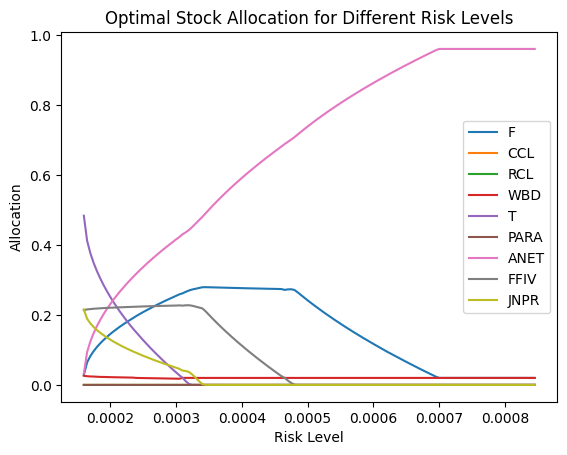

In [ ]:
import matplotlib.pyplot as plt

# Generate the dataframe for proportions of the portfolio for each risk limit
parameter_analysis = pd.DataFrame.from_dict(parameter_analysis, orient='index')
parameter_analysis.columns = ['F','CCL','RCL','WBD','T','PARA','ANET','FFIV','JNPR']
parameter_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Allocation')
plt.show()

This graph displays the varying proportions of stocks in an optimized portfolio across a range of risk levels. As risk increases, the allocation to stock 'ANET' becomes dominant, signifying a higher preference or performance at elevated risk levels. Meanwhile, stocks like 'WBD' maintain minimal allocation throughout, and others exhibit fluctuating shares of the total investment as risk tolerance changes.

In [ ]:
import pandas as pd

# Extracting risk and reward from the 'returns' dictionary
risk = list(returns.keys())
reward = list(returns.values())

# Create a DataFrame using pandas
df = pd.DataFrame({
    'Risk': risk,
    'Reward': reward
})

# Display the DataFrame
print (risk)
print(df)


[0.00016, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000007, 0.00018500000000000008, 0.0001900000000000001, 0.0001950000000000001, 0.00020000000000000012, 0.00020500000000000013, 0.00021000000000000014, 0.00021500000000000016, 0.00022000000000000017, 0.00022500000000000018, 0.0002300000000000002, 0.0002350000000000002, 0.00024000000000000022, 0.0002450000000000002, 0.0002500000000000002, 0.00025500000000000024, 0.00026000000000000025, 0.00026500000000000026, 0.0002700000000000003, 0.0002750000000000003, 0.0002800000000000003, 0.0002850000000000003, 0.0002900000000000003, 0.00029500000000000034, 0.00030000000000000035, 0.00030500000000000037, 0.0003100000000000004, 0.0003150000000000004, 0.0003200000000000004, 0.0003250000000000004, 0.00033000000000000043, 0.00033500000000000044, 0.00034000000000000046, 0.00034500000000000047, 0.0003500000000000005, 0.0003550000000000005, 0.0003600000000000005, 0.0003650000000000005, 0.00037000000000000054, 0

In [ ]:
import pandas as pd

# Specific Risk Level
specific_risk = 0.00035

# Convert risk levels in the DataFrame index to strings to avoid floating point precision issues
parameter_analysis.index = parameter_analysis.index.map(str)

# Convert specific_risk to string if using string indexing
specific_risk_str = str(specific_risk)

# Check if the specific risk exists in the DataFrame
if specific_risk_str in parameter_analysis.index:
    # Access and print the allocation at the specific risk level
    specific_allocation = parameter_analysis.loc[specific_risk_str]
    print(f"Allocations at risk {specific_risk}:", specific_allocation)
else:
    print(f"No data available for risk {specific_risk}")


No data available for risk 0.00035


Converting the values to percentage allocation at a given risk level

In [ ]:
# Given allocations as proportions (simulated as the output)
allocations = {
    'F': 2.790314e-01,
    'CCL': 1.382905e-08,
    'RCL': 6.463749e-08,
    'WBD': 2.000034e-02,
    'T': 2.765774e-07,
    'PARA': 2.477562e-08,
    'ANET': 5.005653e-01,
    'FFIV': 2.003988e-01,
    'JNPR': 3.784307e-06
}

# Multiply each proportion by 100 to convert it to a percentage
allocations_percentages = {stock: proportion * 100 for stock, proportion in allocations.items()}

# Printing the results formatted to show percentages
for stock, percentage in allocations_percentages.items():
    print(f"{stock}: {percentage:.2f}%")


F: 27.90%
CCL: 0.00%
RCL: 0.00%
WBD: 2.00%
T: 0.00%
PARA: 0.00%
ANET: 50.06%
FFIV: 20.04%
JNPR: 0.00%


At the risk level of 0.00035, the stocks that will help us make the most profit along with their allocations are as below -
1. F: 30% (27.90% rounded off to 30%)
2. ANET: 50%
3. FFIV: 20%

Note: Given that the allocation for WBD accounted for merely 2% of the portfolio, we decided to transfer its share to F to streamline the investment distribution.

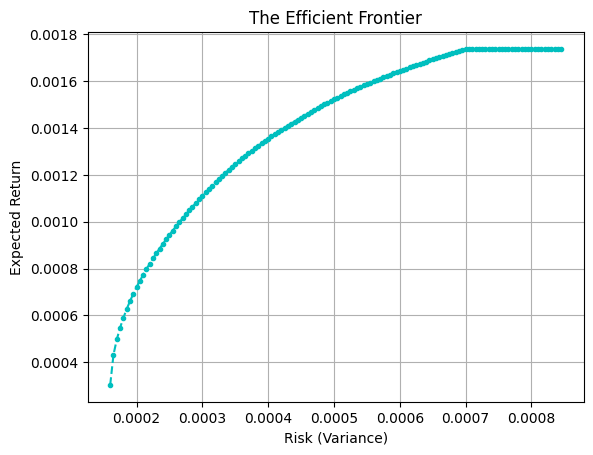

In [ ]:
import matplotlib.pyplot as plt

# Prepare the lists of risk and return values for plotting
risk_values = list(returns.keys())
return_values = [sum(ret) for ret in returns.values()]  # Calculate the total return for each risk level

# Now, plot the Efficient Frontier
plt.plot(risk_values, return_values, marker='.', linestyle='--', color='c')
plt.title('The Efficient Frontier')
plt.xlabel('Risk (Variance)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

The Efficient Frontier displayed in the graph shows optimal portfolios with expected returns ranging from approximately 0.0004 to 0.0018 for risks (variance) between approximately 0.0002 and 0.0008. Initially, a slight increase in risk yields a larger increase in expected return (from 0.0004 to 0.0012 as risk goes from 0.0002 to 0.0005), but beyond a certain point, additional risk results in comparatively smaller increases in return, as seen by the curve flattening out after a risk level of about 0.0007.

# 3 - Buy and Hold Strategy

## Buy-and-Hold strategy for the MPT portfolio

In [ ]:
# Assign the ticker list that we to collect from a data source
tickers_list = ['F','ANET','FFIV']
# Retrieve historical price data for each stock, which will later be matched up with a news score
dow_price = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='12/31/2022',interval='1d') for ticker in tickers_list}
dow_price

{'F':                  open       high        low      close   adjclose     volume  \
 2021-12-31  20.459999  21.010000  20.459999  20.770000  17.724659   51899600   
 2022-01-03  21.270000  21.879999  21.059999  21.770000  18.578035  110449000   
 2022-01-04  22.520000  24.559999  22.420000  24.309999  20.745615  311645200   
 2022-01-05  24.059999  24.950001  23.469999  23.660000  20.190922  253540000   
 2022-01-06  24.090000  24.620001  23.360001  24.459999  20.873623  155058800   
 ...               ...        ...        ...        ...        ...        ...   
 2022-12-23  11.270000  11.400000  11.220000  11.360000  10.010432   38200700   
 2022-12-27  11.280000  11.390000  11.130000  11.200000   9.869441   44837400   
 2022-12-28  11.180000  11.250000  10.900000  10.950000   9.649140   49375400   
 2022-12-29  11.080000  11.550000  11.050000  11.540000  10.169049   53550300   
 2022-12-30  11.400000  11.640000  11.390000  11.630000  10.248357   39232200   
 
            ticker  


In [ ]:
# get the adjclose price for the F (one stock)
df = pd.DataFrame(dow_price['F']['adjclose']).rename(columns = {"adjclose":"F"})

# combine all the tickers (all the rest of the stocks)
for i in tickers_list[1:]:
  df[i] = pd.DataFrame(dow_price[i]['adjclose'])
df

,F,ANET,FFIV
2021-12-31,17.724659,143.750000,244.710007
2022-01-03,18.578035,142.240005,242.750000
2022-01-04,20.745615,138.660004,239.899994
2022-01-05,20.190922,133.149994,232.309998
2022-01-06,20.873623,132.669998,235.699997
...,...,...,...
2022-12-23,10.010432,119.769997,141.009995
2022-12-27,9.869441,118.860001,141.190002
2022-12-28,9.649140,119.169998,138.839996
2022-12-29,10.169049,121.879997,143.149994


In [ ]:
import pandas as pd

# Convert the index to datetime if it's not already in datetime format
df.index = pd.to_datetime(df.index)

# Resample the data to get the last day of each month
last_day_of_month = df.resample('M').last()

# Print the last day of the month value for each stock
print(last_day_of_month)


                    F        ANET        FFIV
2021-12-31  17.724659  143.750000  244.710007
2022-01-31  17.412638  124.309998  207.619995
2022-02-28  15.062361  122.730003  200.850006
2022-03-31  14.504814  138.979996  208.949997
2022-04-30  12.226770  115.570000  167.410004
2022-05-31  11.812304  102.279999  163.039993
2022-06-30   9.610449   93.739998  153.039993
2022-07-31  12.684410  116.629997  167.360001
2022-08-31  13.290564  119.879997  157.059998
2022-09-30   9.767344  112.889999  144.729996
2022-10-31  11.659765  120.860001  142.910004
2022-11-30  12.248680  139.300003  154.610001
2022-12-31  10.248357  121.349998  143.509995


In [ ]:
# Retrieve historical price data for the S&P 500 index
sp500_price = si.get_data('^GSPC', start_date='12/31/2021', end_date='12/31/2022', interval='1d')

# Extract just the adjusted close prices
sp500_df = pd.DataFrame(sp500_price['adjclose']).rename(columns={"adjclose": "^GSPC"})

# Convert the index to datetime
sp500_df.index = pd.to_datetime(sp500_df.index)

# Resample the data to get the last day of each month
sp500_last_day_of_month = sp500_df.resample('M').last()

# Amount to invest
total_investment = 100000

# Calculate the number of index units bought with the total investment on the first trading day of 2022
initial_sp500_price = sp500_df.loc['2022-01-03', '^GSPC']  # Using '2022-01-03' as the first trading day
num_index_units = total_investment / initial_sp500_price
print("no of shares Sp500: " + str(num_index_units))


# Allocated percentages for each stock
allocation_percentages = {'F': 0.30, 'ANET': 0.35, 'FFIV': 0.35}

# Calculating the amount to invest in each stock
allocation_amounts = {ticker: total_investment * percentage for ticker, percentage in allocation_percentages.items()}

# Calculating the number of stocks allocated for each
num_stocks_allocated = {ticker: allocation_amount / df[ticker]['2021-12-31'] for ticker, allocation_amount in allocation_amounts.items()}

# Printing the results
# for ticker in tickers_list:
#    print(f"Number of {ticker} stocks allocated: {num_stocks_allocated[ticker]:.2f}")
#    print(f"Amount invested in {ticker}: ${allocation_amounts[ticker]:.2f}")

# table1 = pd.DataFrame(list(num_stocks_allocated.items()), columns=['Stock', 'Initial Investment'])
# print("Table 1: Initial Investments")
# print(table1)
import pandas as pd

# Create DataFrame for the table
table_df = pd.DataFrame({
    'Stock': tickers_list,
    'Number of Stocks Allocated': [num_stocks_allocated[ticker] for ticker in tickers_list],
    'Amount Invested ($)': [allocation_amounts[ticker] for ticker in tickers_list]
})

# Print the DataFrame in a formatted table
print(table_df.to_string(index=False))


no of shares Sp500: 20.848274342116312
Stock  Number of Stocks Allocated  Amount Invested ($)
    F                 1692.557248              30000.0
 ANET                  243.478261              35000.0
 FFIV                  143.026436              35000.0


In [ ]:
F_alloc=1692.557066
ANET_alloc=347.826087
FFIV_alloc=81.729392

In [ ]:
# get stock value from allocation
# Valuesp = pd.DataFrame()

Value = pd.DataFrame()
Value['Value_F'] = last_day_of_month['F'] * 1692.557248
Value['Value_F_return'] = Value['Value_F'].pct_change() * 100
Value['Value_ANET'] = last_day_of_month['ANET'] * 243.478261
Value['Value_ANET_return'] = Value['Value_ANET'].pct_change() * 100
Value['Value_FFIV'] = last_day_of_month['FFIV'] * 143.026436
Value['Value_FFIV_return'] = Value['Value_FFIV'].pct_change() * 100
Value['Value_sp500'] = sp500_last_day_of_month['^GSPC'] * 20.8483
Value['Value_sp500_return'] = Value['Value_sp500'].pct_change() * 100
Value['Total_Portfolio_Value'] = Value['Value_F'] + Value['Value_ANET'] + Value['Value_FFIV']
Value['Total_Portfolio_Value_return'] = Value['Total_Portfolio_Value'].pct_change() * 100
print(Value)

                 Value_F  Value_F_return    Value_ANET  Value_ANET_return  \
2021-12-31  30000.000001             NaN  35000.000019                NaN   
2022-01-31  29471.886164       -1.760379  30266.782030         -13.523480   
2022-02-28  25493.907882      -13.497535  29882.087790          -1.271011   
2022-03-31  24550.228317       -3.701589  33838.607674          13.240440   
2022-04-30  20694.508862      -15.705432  28138.782549         -16.844148   
2022-05-31  19992.999977       -3.389831  24902.956238         -11.499525   
2022-06-30  16266.234836      -18.640350  22823.651666          -8.349629   
2022-07-31  21469.090243       31.985616  28396.868912          24.418605   
2022-08-31  22495.039723        4.778728  29188.173260           2.786590   
2022-09-30  16531.788070      -26.509185  27486.260736          -5.830829   
2022-10-31  19734.820173       19.374989  29426.782773           7.059971   
2022-11-30  20731.592307        5.050830  33916.522500          15.257324   

## Buy-and-Hold strategy for the S&P 500 index

In [ ]:
# Retrieve historical price data for the S&P 500 index
sp500_price = si.get_data('^GSPC', start_date='12/31/2021', end_date='12/31/2022', interval='1d')

# Extract just the adjusted close prices
sp500_df = pd.DataFrame(sp500_price['adjclose']).rename(columns={"adjclose": "^GSPC"})

# Convert the index to datetime
sp500_df.index = pd.to_datetime(sp500_df.index)

# Resample the data to get the last day of each month
sp500_last_day_of_month = sp500_df.resample('M').last()

# Calculate the number of index units bought with the total investment on the first trading day of 2022
initial_sp500_price = sp500_df.loc['2022-01-03', '^GSPC']  # Using '2022-01-03' as the first trading day
num_index_units = total_investment / initial_sp500_price
print("no of shares: " + str(num_index_units))

# Calculate the aggregate value of the investment on the last trading day of each month
Valuesp = pd.DataFrame()
Valuesp['Value_sp500'] = sp500_last_day_of_month['^GSPC'] * 20.8483
Valuesp['Value_sp500_return'] = Valuesp['Value_sp500'].pct_change() * 100

# Display the table
print(Valuesp)


no of shares: 20.848274342116312
             Value_sp500  Value_sp500_return
2021-12-31  99366.754159                 NaN
2022-01-31  94141.536993           -5.258517
2022-02-28  91189.212080           -3.136049
2022-03-31  94451.350061            3.577329
2022-04-30  86143.719884           -8.795671
2022-05-31  86148.300809            0.005318
2022-06-30  78918.735411           -8.392000
2022-07-31  86109.525821            9.111639
2022-08-31  82455.026500           -4.244013
2022-09-30  74754.083889           -9.339567
2022-10-31  80724.200227            7.986341
2022-11-30  85063.359553            5.375289
2022-12-31  80047.047850           -5.897147


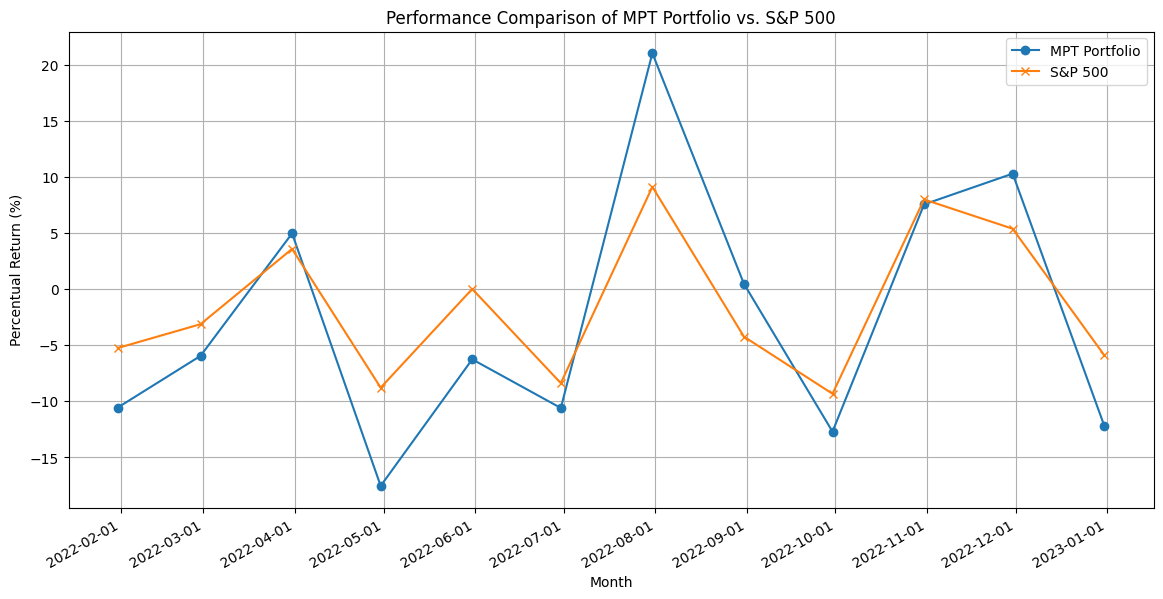

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Prepare the data for plotting
# We're ensuring that the 'Date' is the same for both datasets.
Value['Date'] = Value.index

# Plotting the performance comparison
plt.figure(figsize=(14, 7))

# Plotting the MPT portfolio returns
plt.plot(Value['Date'], Value['Total_Portfolio_Value_return'], label='MPT Portfolio', marker='o')

# Plotting the S&P 500 returns
plt.plot(Value['Date'], Value['Value_sp500_return'], label='S&P 500', marker='x')

# Formatting the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotating the date labels for better readability
plt.gcf().autofmt_xdate()

# Adding the legend, labels, and title to the plot
plt.legend()
plt.xlabel('Month')
plt.ylabel('Percentual Return (%)')
plt.title('Performance Comparison of MPT Portfolio vs. S&P 500')
plt.grid(True)

# Display the plot
plt.show()



The line graph presents a side-by-side monthly performance comparison between a portfolio constructed using Modern Portfolio Theory (MPT) and the S&P 500 from February 2022 to January 2023. The MPT portfolio demonstrates a pattern of closely tracking the S&P 500's returns, with notable divergences—such as in August, where the MPT portfolio substantially outperforms the index, and in the following month, where it underperforms. This comparative performance may reflect the MPT portfolio's risk-adjusted construction, which can lead to differentiated returns based on market movements and the specific mix of assets chosen within the portfolio.

# 4 - Monte Carlo Analysis

## Getting Stock Data for Mean and Standard Deviation

In [ ]:
tickers_list = ['F','ANET','FFIV']
# Retrieve historical price data for each stock, which will later be matched up with a news score
dow_price = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}
dow_price

{'F':                  open       high        low      close   adjclose    volume  \
 2017-01-03  12.200000  12.600000  12.130000  12.590000   8.708391  40510800   
 2017-01-04  12.770000  13.270000  12.740000  13.170000   9.109571  77638100   
 2017-01-05  13.210000  13.220000  12.630000  12.770000   8.832897  75628400   
 2017-01-06  12.800000  12.840000  12.640000  12.760000   8.825976  40315900   
 2017-01-09  12.790000  12.860000  12.630000  12.630000   8.736056  39438400   
 ...               ...        ...        ...        ...        ...       ...   
 2021-12-23  20.080000  20.410000  20.000000  20.250000  17.280901  50610500   
 2021-12-27  20.260000  20.889999  20.100000  20.799999  17.750259  59651800   
 2021-12-28  20.660000  21.059999  20.590000  20.760000  17.716124  53020500   
 2021-12-29  20.709999  20.770000  20.450001  20.559999  17.545446  37883000   
 2021-12-30  20.590000  20.959999  20.469999  20.469999  17.468645  51470100   
 
            ticker  
 2017-01-03 

In [ ]:
# get the adjclose price for the F (one stock)
df = pd.DataFrame(dow_price['F']['adjclose']).rename(columns = {"adjclose":"F"})

# combine all the tickers (all the rest of the stocks)
for i in tickers_list[1:]:
  df[i] = pd.DataFrame(dow_price[i]['adjclose'])
df

,F,ANET,FFIV
2017-01-03,8.708391,24.264999,144.800003
2017-01-04,9.109571,25.432501,145.460007
2017-01-05,8.832897,25.485001,144.419998
2017-01-06,8.825976,25.320000,144.449997
2017-01-09,8.736056,24.879999,144.149994
...,...,...,...
2021-12-23,17.280901,141.850006,234.839996
2021-12-27,17.750259,146.839996,243.320007
2021-12-28,17.716124,144.889999,246.710007
2021-12-29,17.545446,145.710007,247.779999


In [ ]:
# create return features for each ticker,
# Using pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = df[i].pct_change()
# drop na records
return_data.dropna(inplace=True)
return_data

,F,ANET,FFIV
2017-01-04,0.046068,0.048115,0.004558
2017-01-05,-0.030372,0.002064,-0.007150
2017-01-06,-0.000784,-0.006474,0.000208
2017-01-09,-0.010188,-0.017378,-0.002077
2017-01-10,0.017419,0.009043,0.000624
...,...,...,...
2021-12-23,0.005462,0.016627,0.017020
2021-12-27,0.027161,0.035178,0.036110
2021-12-28,-0.001923,-0.013280,0.013932
2021-12-29,-0.009634,0.005660,0.004337


In [ ]:
# Calculate mean
mean_values = return_data.mean()

# Calculate standard deviation
std_dev_values = return_data.std()

# Print mean and standard deviation for each column
print("Mean Values:")
print(mean_values)
print("\nStandard Deviation Values:")
print(std_dev_values)

Mean Values:
F       0.000819
ANET    0.001788
FFIV    0.000590
dtype: float64

Standard Deviation Values:
F       0.023156
ANET    0.027323
FFIV    0.018398
dtype: float64


## Simulating Returns and Distribution Plots

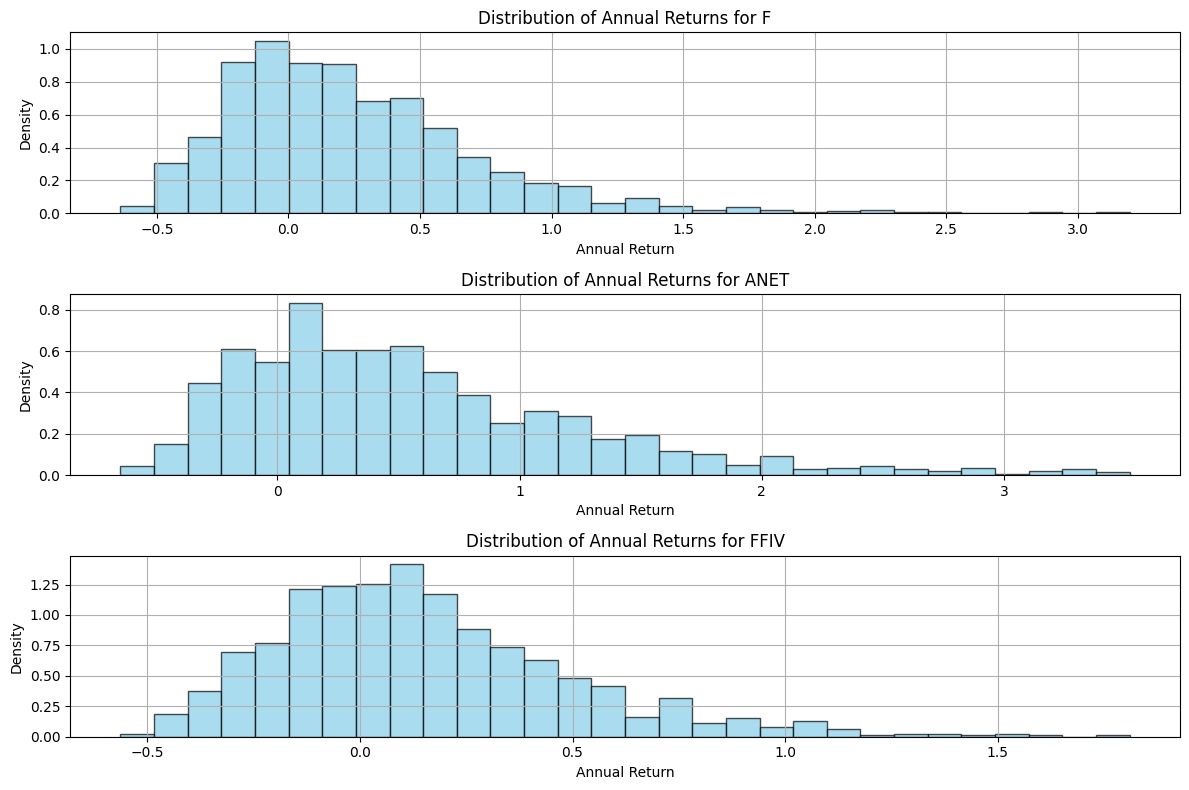

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Mean and standard deviation values obtained from the previous step
mean_values = return_data.mean()
std_dev_values = return_data.std()

# Number of simulations
num_simulations = 1000

# Number of trading days in a year
trading_days_per_year = 252

# Initialize an array to store the annual returns for each simulation
annual_returns = np.zeros((num_simulations, len(mean_values)))

# Perform the simulations
for i in range(num_simulations):
    # Generate random daily returns for each stock for one year
    daily_returns = np.random.normal(loc=mean_values, scale=std_dev_values, size=(trading_days_per_year, len(mean_values)))

    # Calculate the cumulative return for each stock for the year
    cumulative_return = np.prod(1 + daily_returns, axis=0) - 1

    # Store the annual return for this simulation
    annual_returns[i] = cumulative_return

# Plot the distribution of annual returns for each stock separately
plt.figure(figsize=(12, 8))
for i, stock in enumerate(return_data.columns):
    plt.subplot(3, 1, i + 1)
    plt.hist(annual_returns[:, i], bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Annual Returns for {stock}')
    plt.xlabel('Annual Return')
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()


**Simulating the returns and Distribution plots**

The plots illustrate the frequency distribution of simulated annual returns for three stocks—denoted as F, ANET, and FFIV—using histograms with 30 bins each, normalized to show density. For stock F, the returns are centered around 0.5 with a spread from approximately -0.5 to 1.5. For ANET, the peak density is near an annual return of 0, with a range stretching from -0.5 to 2.5. The FFIV stock shows a central tendency around 0.25, with returns extending from -0.75 to 1.5. The histograms' skewness and kurtosis provide insight into the expected returns' deviation from a normal distribution.

## Plot for Portfolio Returns

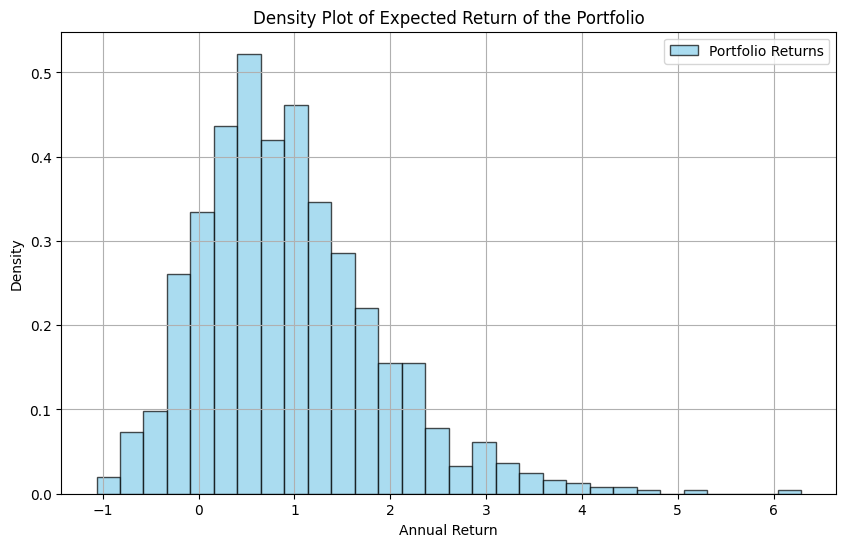

In [ ]:
# Calculate the total annual return for each simulation (portfolio return)
portfolio_annual_returns = np.sum(annual_returns, axis=1)

# Plot the density plot of the expected return of the portfolio
plt.figure(figsize=(10, 6))
plt.hist(portfolio_annual_returns, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Portfolio Returns')
plt.title('Density Plot of Expected Return of the Portfolio')
plt.xlabel('Annual Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


This Python script performs a Monte Carlo simulation to model the distribution of annual returns for stocks. It sets a random seed for consistency in results and then initializes mean and standard deviation values for stock returns. It simulates 1000 scenarios of daily returns, based on the mean and standard deviation, over a typical trading year of 252 days. These daily returns are compounded to compute the annual return for each stock in each simulation. Finally, it visualizes the distribution of these simulated annual returns for each stock in a histogram, providing a probabilistic view of expected annual returns and their variability for each stock in the dataset.

**Plot for Portfolio Returns**

The code calculates the sum of annual returns for a set of simulated investment portfolios and then generates a histogram to visualize the distribution of these returns as a density plot. The histogram shows that most portfolio returns are concentrated around the 1 to 2 range, with the frequency of returns decreasing for larger and smaller values. The plot indicates the likelihood of various return outcomes from the simulated data, providing a visual representation of potential portfolio performance.

## Probabilities of Loosing Money

In [ ]:
# Calculate the probability of each stock losing money
prob_lose_money_per_stock = np.mean(annual_returns < 0, axis=0)

# Report the probability that each stock will lose money
for i, (stock, prob) in enumerate(zip(return_data.columns, prob_lose_money_per_stock), 1):
    print(f"Probability of losing money for {stock}: {prob:.2%}")


Probability of losing money for F: 35.20%
Probability of losing money for ANET: 22.20%
Probability of losing money for FFIV: 36.10%


In [ ]:
# Calculate the probability that the portfolio will lose money
prob_lose_money_portfolio = np.mean(portfolio_annual_returns < 0)

# Report the probability that your portfolio will lose money
print(f"Probability of the portfolio losing money: {prob_lose_money_portfolio:.2%}")


Probability of the portfolio losing money: 14.50%


# 5 - Conclusion

In conclusion, our analysis reveals valuable insights into portfolio optimization and risk management. The individual probabilities of negative returns for stocks such as F, ANET, and FFIV are 35.20%, 22.20%, and 36.10%, respectively.

However, when considering the entire portfolio, which has a probability of 14.50% of experiencing negative returns, the impact of individual stock performance is mitigated. This phenomenon underscores the power of diversification in reducing portfolio risk.

By holding a mix of different stocks, investors spread their risk across various assets, reducing the impact of any single stock's poor performance. Additionally, the correlations identified in the covariance matrix suggest potential diversification opportunities, further enhancing risk management strategies.

Through prudent diversification and informed decision-making, investors can optimize risk-return profiles effectively and strive to achieve their financial objectives in the dynamic landscape of the financial markets.


Our Risk levels are too low as our values from Covariance matrix are very small indicating indicates weak linear dependence between the variables. If we go for higher risk levels, all our portfolio will have only one stock. Inorder to get the allocation that was required in the project, we had to choose very small risk levels.